# COVID-19 Political Analysis

In late September 2020, President Trump stated the following regarding the number of Coronavirus cases in the United States: “If you take the blue states out,” he said, “we’re at a level that I don’t think anybody in the world would be at. We’re really at a very low level.” This statement seems to be an alleged causal relationship -- that political leaning of a geographic area is the reason that Coronavirus cases are higher in some locations than others -- and it is, in my opinion, ripe for a deeper dive exploratory data analysis. Let's call it a fact check on President Trump's statement. 

References:

Baker, P. (2020, September 18). For Trump, It's Not the United States, It's Red and Blue States. https://www.nytimes.com/2020/09/17/us/politics/trump-america.html. 

## Project Goals

My goals for this project include:

* Determining if in fact there is a correlation between "blue" states and the rate of Coronavirus infections 
* Exploring whether other factors, such as population density, may actually be more significant contributing factors (from a purely geographical perspective) behind rates of Coronavirus infections
* Testing a hypothesis that Coronavirus infection rates are correlated to population densities and that the higher the population density, the higher is the tendency for a county (or city or state) to be "blue"


## Datasets

**Update 11/6/2020: New datasets added.**
**Update 11/7/2020: Time Series datasets (Confirmed and Deaths) added, new dictionary for df2 established.**

I have chosen five different sources of data to start with in my Exploratory Data Analysis Project, which has now been expanded into more political-related data sets:

* First data set is the Covid-19 data set that is compiled daily by the Johns Hopkins Coronavirus Resource Center. Please note that this includes data world-wide so I will restrict this dataset to US only, then I will focus on State and County data:

https://coronavirus.jhu.edu/map.html

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

* Second data set is the current population estimate of each county within the United States, available via census.gov. Please note that this dataset is quite large (164 columns) so I intend to cull it significantly by only locating the columns that reflect the most recent population estimates by state and by county:

https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html#par_textimage_70769902

* Third data set is the land area of each county within the United States, also available via census.gov. Please note that this dataset is also large so I intend to cull it significantly by only locating the columns that reflect the most recent land area data by state and by county:

https://www.census.gov/library/publications/2011/compendia/usa-counties-2011.html

* I will need to supplement with data about political parties, so I intend supplement this further as I explore the data. As a starting point I will create a list of the political affiliation of the governor of each state and each major city of in the Unites States. I may need to also create a table of the location of each major city (which county it lies in).

**Update 11/6/2020: Addition of FIPS information**

* To facilitate a better analysis, I have realized how FIPS data can better connect the county-level data that I have obtained. (I wish I had learned this earlier!) So, I have added a FIPS databased, which includes FIPS (Federal Information Processing Standards) numbers for every county in the US. The database is located here:

https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt#:~:text=Federal%20Information%20Processing%20System%20(FIPS,on%20the%20level%20of%20geography.

**Update 11/6/2020: Addition of County Presidential Election Returns 2016**

* Lastly, I have now added information regarding the 2016 Presidential Election Results, specifically I have added another data column to my dataset which identifies how a county voted (Democrat or Republican) for the 2016 Presidential Election.

https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ/HEIJCQ&version=6.0

## Reading and inspecting the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

covid = pd.read_csv('10-23-2020.csv')
population = pd.read_csv('co-est2019-alldata.csv')
area = pd.read_csv('LND01.csv')
governor = pd.read_csv('governor.csv')

#Update 11/6/2020: Add a FIPS database

fips = pd.read_csv('fips.csv')

#Update 11/6/2020: Add 2016 Presidential Election Database

pres = pd.read_csv('countypres_2000-2016.csv')

#Update 11/7/2020: Add a means of turning off warnings (I used this code courtesy of Stackoverflow.com)

import warnings
warnings.filterwarnings('ignore')

In [2]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958 entries, 0 to 3957
Data columns (total 14 columns):
FIPS                   3261 non-null float64
Admin2                 3266 non-null object
Province_State         3789 non-null object
Country_Region         3958 non-null object
Last_Update            3958 non-null object
Lat                    3877 non-null float64
Long_                  3877 non-null float64
Confirmed              3958 non-null int64
Deaths                 3958 non-null int64
Recovered              3958 non-null int64
Active                 3955 non-null float64
Combined_Key           3958 non-null object
Incidence_Rate         3877 non-null float64
Case-Fatality_Ratio    3916 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 433.0+ KB


In [3]:
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-24 04:24:46,33.93911,67.709953,40687,1507,34010,5170.0,Afghanistan,104.517683,3.703886
1,NaN,NaN,NaN,Albania,2020-10-24 04:24:46,41.15330,20.168300,18556,469,10466,7621.0,Albania,644.798110,2.527484
2,NaN,NaN,NaN,Algeria,2020-10-24 04:24:46,28.03390,1.659600,55630,1897,38788,14945.0,Algeria,126.861293,3.410031
3,NaN,NaN,NaN,Andorra,2020-10-24 04:24:46,42.50630,1.521800,4038,69,2729,1240.0,Andorra,5226.169676,1.708767
4,NaN,NaN,NaN,Angola,2020-10-24 04:24:46,-11.20270,17.873900,8829,265,3384,5180.0,Angola,26.863409,3.001472


In [4]:
covid.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3953,NaN,NaN,NaN,West Bank and Gaza,2020-10-24 04:24:46,31.952200,35.233200,49579,439,42850,6290.0,West Bank and Gaza,971.867419,0.885456
3954,NaN,NaN,NaN,Western Sahara,2020-10-24 04:24:46,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3955,NaN,NaN,NaN,Yemen,2020-10-24 04:24:46,15.552727,48.516388,2060,599,1354,107.0,Yemen,6.906733,29.077670
3956,NaN,NaN,NaN,Zambia,2020-10-24 04:24:46,-13.133897,27.849332,16095,346,15179,570.0,Zambia,87.549165,2.149736
3957,NaN,NaN,NaN,Zimbabwe,2020-10-24 04:24:46,-19.015438,29.154857,8257,236,7771,250.0,Zimbabwe,55.554333,2.858181


In [5]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Columns: 164 entries, SUMLEV to RNETMIG2019
dtypes: float64(54), int64(108), object(2)
memory usage: 4.0+ MB


In [6]:
population.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [7]:
population.tail()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43574,...,-17.605427,0.502513,15.035735,-4.614071,-13.140225,-13.762031,-18.484164,-23.515727,-18.743773,-17.065527
3189,50,4,8,56,39,Wyoming,Teton County,21294,21298,21296,...,-1.583464,-2.575509,1.905293,23.259519,12.508872,4.670450,1.253214,-0.171608,-12.432212,1.797445
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21121,21089,...,-9.181105,-18.196975,-4.487730,-10.870861,-15.033634,-10.484550,-11.485101,-18.923455,-13.554993,-9.181105
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8528,8530,...,-7.652085,-12.839390,-3.084589,-1.307811,-18.938032,0.000000,-15.204038,-15.950541,-17.246806,-8.289759
3192,50,4,8,56,45,Wyoming,Weston County,7208,7208,7198,...,0.000000,-9.065551,-10.549265,6.191515,0.420345,9.201171,0.693097,-36.227798,-6.910452,2.599090


In [8]:
area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 34 columns):
Areaname       3198 non-null object
STCOU          3198 non-null int64
LND010190F     3198 non-null int64
LND010190D     3198 non-null float64
LND010190N1    3198 non-null int64
LND010190N2    3198 non-null int64
LND010200F     3198 non-null int64
LND010200D     3198 non-null float64
LND010200N1    3198 non-null int64
LND010200N2    3198 non-null int64
LND110180F     3198 non-null int64
LND110180D     3198 non-null float64
LND110180N1    3198 non-null int64
LND110180N2    3198 non-null int64
LND110190F     3198 non-null int64
LND110190D     3198 non-null float64
LND110190N1    3198 non-null int64
LND110190N2    3198 non-null int64
LND110200F     3198 non-null int64
LND110200D     3198 non-null float64
LND110200N1    3198 non-null int64
LND110200N2    3198 non-null int64
LND110210F     3198 non-null int64
LND110210D     3198 non-null float64
LND110210N1    3198 non-null int64
LND11

In [9]:
area.head()

,Areaname,STCOU,LND010190F,LND010190D,LND010190N1,LND010190N2,LND010200F,LND010200D,LND010200N1,LND010200N2,...,LND110210N1,LND110210N2,LND210190F,LND210190D,LND210190N1,LND210190N2,LND210200F,LND210200D,LND210200N1,LND210200N2
0,UNITED STATES,0,0,3787425.08,0,0,0,3794083.06,0,0,...,0,0,0,251083.35,0,0,0,256644.62,0,0
1,ALABAMA,1000,0,52422.94,0,0,0,52419.02,0,0,...,0,0,0,1672.71,0,0,0,1675.01,0,0
2,"Autauga, AL",1001,0,604.49,0,0,0,604.45,0,0,...,0,0,0,8.48,0,0,0,8.48,0,0
3,"Baldwin, AL",1003,0,2027.08,0,0,0,2026.93,0,0,...,0,0,0,430.55,0,0,0,430.58,0,0
4,"Barbour, AL",1005,0,904.59,0,0,0,904.52,0,0,...,0,0,0,19.59,0,0,0,19.61,0,0


In [10]:
area.tail()

,Areaname,STCOU,LND010190F,LND010190D,LND010190N1,LND010190N2,LND010200F,LND010200D,LND010200N1,LND010200N2,...,LND110210N1,LND110210N2,LND210190F,LND210190D,LND210190N1,LND210190N2,LND210200F,LND210200D,LND210200N1,LND210200N2
3193,"Sweetwater, WY",56037,0,10491.73,0,0,0,10491.17,0,0,...,0,0,0,65.86,0,0,0,65.87,0,0
3194,"Teton, WY",56039,0,4221.96,0,0,0,4221.80,0,0,...,0,0,0,214.02,0,0,0,214.04,0,0
3195,"Uinta, WY",56041,0,2087.66,0,0,0,2087.56,0,0,...,0,0,0,5.91,0,0,0,5.90,0,0
3196,"Washakie, WY",56043,0,2242.85,0,0,0,2242.75,0,0,...,0,0,0,2.69,0,0,0,2.69,0,0
3197,"Weston, WY",56045,0,2400.13,0,0,0,2400.07,0,0,...,0,0,0,2.21,0,0,0,2.21,0,0


In [11]:
# Update 11/6/2020: Added election results database
pres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50524 entries, 0 to 50523
Data columns (total 11 columns):
year              50524 non-null int64
state             50524 non-null object
state_po          50460 non-null object
county            50524 non-null object
FIPS              50476 non-null float64
office            50524 non-null object
candidate         50524 non-null object
party             34735 non-null object
candidatevotes    50120 non-null float64
totalvotes        50524 non-null int64
version           50524 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.2+ MB


In [12]:
# Update 11/6/2020: Added election results database
pres.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203


In [13]:
# Update 11/6/2020: Added election results database
pres.tail()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
50519,2016,Alaska,AK,District 40,2040.0,President,Donald Trump,republican,1377.0,4610,20191203
50520,2016,Alaska,AK,District 40,2040.0,President,Other,NaN,895.0,4610,20191203
50521,2016,Alaska,NaN,District 99,2099.0,President,Hillary Clinton,democrat,274.0,5056,20191203
50522,2016,Alaska,NaN,District 99,2099.0,President,Donald Trump,republican,40.0,5056,20191203
50523,2016,Alaska,NaN,District 99,2099.0,President,Other,NaN,28.0,5056,20191203


## Data Dictionary (After Data Cleaning)

The data is as follows:
    
* Covid data is actual case-related data furnished by the CDC. It represents a full population of "Infected" and "Died" cases of Coronavirus.

* Population data is the entire population of the US. So, it represents a County-by-County estimate of the 2019 Population of the US.

* Area area is the entire land area, in square miles, of the US.

My data dictionary for the "df" dataframe is as follows:
    
* **FIPS**: County-Level FIPS code for the US (Added 11/6/2020)
* **CTYNAME**: US County Name
* **STNAME**: US State Name
* **Confirmed**: Counts include confirmed and probable Covid-19 cases (where reported)
* **Deaths**: Counts include confirmed and probable Covid-19 deaths (where reported)
* **Incidence_Rate**: Cases per 100,000 persons
* **Case-Fatality_Ratio**: Case-Fatality Ratio (%) = Number recorded deaths / Number cases
* **2019_Population**: 2019 US Census Estimate of Population
* **Area_Sq_Miles**: 2010 US Census Land Area in Square Miles
* **Pop_Density**: Population Density Ratio (%) = 2019 Population / Land Area (people per square mile)
* **Governor**: Political affiliation of the Governor of each US State, as of 10/25/2020

Source: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/README.md

## Cleaning Covid dataset

As a very first step, I am only interested in the Coronavirus data that pertains to the United States.  I see from the data that the "Country_Region" column designated the United States as "US" so I restrict the dataset to only "US"

In [14]:
covid_clean = covid[covid['Country_Region'] == 'US']

After looking through the relevant columns, I restrict the data to:

* "FIPS" (which helps me to isolate just the county data, which you will see below), 
* "Admin2" renamed to "CTYNAME" (which is the County Name),
* "Province_State" renamed to "STNAME" (which is the State Name),
* "Confirmed" (Total Confirmed Coronavirus Cases),
* "Deaths" (Total Coronavirus Deaths),
* "Incidence_Rate" (I'll reserve this data for later...)
* "Case-Fatality Rate" (I'll reserve this data for later...)

In [15]:
covid_cols_clean = ['FIPS', 'Admin2', 'Province_State', 'Confirmed', 'Deaths', 'Incidence_Rate', 'Case-Fatality_Ratio']

In [16]:
covid_clean = covid_clean[covid_cols_clean]

In [17]:
covid_clean.rename(columns = {'Admin2': 'CTYNAME', 'Province_State': 'STNAME'}, inplace = True)

In [18]:
covid_clean.STNAME.nunique()

58

I would expect this count to be 51 (including Washington DC), as I am not interested in US Territories, so let's look closer at this data and eliminate the data for non-US States. I notice that there are categories for "Diamond Princess" and "Grand Princess", and "Recovered"; and there are also data for the US Territories. So I remove rows pertaining to all seven (7) of these STNAME categories.

In [19]:
covid_clean.STNAME.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Recovered', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [20]:
covid_STNAME_clean = ['Diamond Princess', 'Grand Princess', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Recovered', 'Virgin Islands']

In [21]:
covid_clean = covid_clean[~covid_clean.STNAME.isin(covid_STNAME_clean)]

On previous scanning of the data, I noticed that there are some odd values, that include "Unassigned" and "Out of...". For ease of analysis, I decide to remove these from the data set, although I do recognize that by doing a portion of my data may be missing, thus slightly altering results. Luckily these values are easily separated from the rest of the data through the "FIPS" column, as all of this irregular data has a FIPS >= 80000.

However, unless I determine a slick way of reincorporating this data, I decide to remove it for now. This means that my total Confirmed Cases will be 43,977 less than the full dataset and the total Deaths will be 1,072 less than the full dataset.  I may return to this later, but for expediency sake I move forward.

In [22]:
covid_clean[covid_clean.FIPS >= 80000].sample(5)

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
2446,90033.0,Unassigned,New Hampshire,14,0,NaN,0.0
1849,90023.0,Unassigned,Maine,0,0,NaN,NaN
944,90008.0,Unassigned,Colorado,0,0,NaN,NaN
1199,90015.0,Unassigned,Hawaii,0,0,NaN,NaN
2500,90035.0,Unassigned,New Mexico,1601,0,NaN,0.0


In [23]:
covid_clean[covid_clean.FIPS >= 80000].sum()

FIPS                                                         5.30168e+06
CTYNAME                Out of ALUnassignedUnassignedUnassignedUnassig...
STNAME                 AlabamaAlabamaAlaskaArizonaArkansasCaliforniaC...
Confirmed                                                          43977
Deaths                                                              1072
Incidence_Rate                                                         0
Case-Fatality_Ratio                                              221.992
dtype: object

In [24]:
covid_clean = covid_clean[covid_clean.FIPS < 80000]

In [25]:
# Update 11/6/2020: After more research and a desire to add in more data, I have learned that the FIPS code will be useful.
# Therefore I keep the FIPS code within the database.
# covid_clean = covid_clean.drop(["FIPS"], axis = 1)

In [26]:
# Update 11/6/2020: Set FIPs code as integer
covid_clean.FIPS = pd.to_numeric(covid_clean.FIPS)

Now I can see that I have a cleaner (though not fully cleaned) dataset that includes 3,116 rows and 7 columns.  I confirm that I have all 50 States represented, plus Washington DC, for a total of 51 unique STNAMEs.

In [27]:
covid_clean.shape

(3116, 7)

In [28]:
covid_clean.STNAME.nunique()

51

In [29]:
covid_clean.sample(5)

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
2658,37183.0,Wake,North Carolina,20283,269,1824.402907,1.326234
3188,46121.0,Todd,South Dakota,395,5,3881.300973,1.265823
722,2198.0,Prince of Wales-Hyder,Alaska,33,0,532.000645,0.000000
2374,31101.0,Keith,Nebraska,93,0,1157.580284,0.000000
1037,13013.0,Barrow,Georgia,2548,50,3061.028352,1.962323


## Cleaning Population dataset

Now I move over to looking at my population data, which includes the population of the United States, by State and by County. By reviewing the data library provided by the US Census Website, I learn that the population of the US is estimated based off of the 2010 census. I am most interested in the 2019 Estimate of the US Population, so I discover that this column is call "POPESTIMATE2019". Thus, I restrict my dataset to:

* "SUMLEV" (which helps me to isolate just the county data, which you will see below),
* "POPESTIMATE2019", renamed to "2019_Population" (which is the 2019 Population)
* "STNAME" (which is the State Name),
* "CTYNAME" (which is the County Name)

In [30]:
pd.set_option('display.max_rows', 1000)
population.columns.to_series()

SUMLEV                                  SUMLEV
REGION                                  REGION
DIVISION                              DIVISION
STATE                                    STATE
COUNTY                                  COUNTY
STNAME                                  STNAME
CTYNAME                                CTYNAME
CENSUS2010POP                    CENSUS2010POP
ESTIMATESBASE2010            ESTIMATESBASE2010
POPESTIMATE2010                POPESTIMATE2010
POPESTIMATE2011                POPESTIMATE2011
POPESTIMATE2012                POPESTIMATE2012
POPESTIMATE2013                POPESTIMATE2013
POPESTIMATE2014                POPESTIMATE2014
POPESTIMATE2015                POPESTIMATE2015
POPESTIMATE2016                POPESTIMATE2016
POPESTIMATE2017                POPESTIMATE2017
POPESTIMATE2018                POPESTIMATE2018
POPESTIMATE2019                POPESTIMATE2019
NPOPCHG_2010                      NPOPCHG_2010
NPOPCHG_2011                      NPOPCHG_2011
NPOPCHG_2012 

In [31]:
pd.reset_option('display.max_rows')
population_cols_clean = ['SUMLEV', 'STNAME', 'CTYNAME', 'POPESTIMATE2019']

In [32]:
population_clean = population[population_cols_clean]

In [33]:
population_clean.rename(columns = {'POPESTIMATE2019': '2019_Population'}, inplace = True)

Luckily the County Level values are easily separated from the rest of the data through the "SUMLEV" column, as all of County data has a SUMLEV == 50 (versus the State Level data which has a SUMLEV == 40). So, I restrict my dataset to the County level data only.

Once I do this, I confirm (as I did with the Covid data) that there are 51 States/DC represented in the dataset.

In [34]:
population_clean = population_clean[population.SUMLEV == 50]

In [35]:
population_clean = population_clean.drop(["SUMLEV"], axis = 1)

In [36]:
population_clean.STNAME.nunique()

51

Scanning through this data, I realize that there are differences in syntax for the County Names as compared with the Covid dataset. For instance, in the population dataset, there are "County", "Parrish", "Borough", etc. So, in order to effectively combine these datasets I must remove the ends of each string, resulting in the County Name only (to match the convention for the Covid dataset).

In [37]:
for i in range(len(population_clean)):
    population_clean.CTYNAME.iloc[i] = population_clean.CTYNAME.iloc[i].replace(" County", "")
    population_clean.CTYNAME.iloc[i] = population_clean.CTYNAME.iloc[i].replace(" Parrish", "")
    population_clean.CTYNAME.iloc[i] = population_clean.CTYNAME.iloc[i].replace(" Borough", "")
    population_clean.CTYNAME.iloc[i] = population_clean.CTYNAME.iloc[i].replace(" Census Area", "")
    population_clean.CTYNAME.iloc[i] = population_clean.CTYNAME.iloc[i].replace(" Municipality", "") 
    population_clean.CTYNAME.iloc[i] = population_clean.CTYNAME.iloc[i].replace(" City and Borough", "") 
    population_clean.CTYNAME.iloc[i] = population_clean.CTYNAME.iloc[i].replace(" City and", "") 

Now I can see that I have a cleaner (though not fully cleaned) population dataset that includes 3,142 rows and 3 columns.  I confirm that I have all 50 States represented, plus Washington DC, for a total of 51 unique STNAMEs.

In [38]:
population_clean.shape

(3142, 3)

In [39]:
population_clean.STNAME.nunique()

51

In [40]:
population_clean.sample(5)

,STNAME,CTYNAME,2019_Population
3004,Washington,Chelan,77200
2688,Texas,Jeff Davis,2274
614,Illinois,Bureau,32628
1599,Missouri,Ripley,13288
814,Iowa,Buchanan,21175


There are around 30 records that I need to hunt down so that the population dataset is completely consistent with the covid dataset. I decide to tackle this by doing a state-by-state comparison, counting how many counties each state has in both datasets.  The states which report "False" means that I need to clean this data. When I run this analysis, I learn that "Alaska", "Hawaii", "Massachusetts" and "Utah" warrant further review.

In [41]:
covid_counties_count = covid_clean.groupby(covid_clean['STNAME']).agg(['count']).CTYNAME
population_counties_count = population_clean.groupby(population_clean['STNAME']).agg(['count']).CTYNAME

population_counties_count == covid_counties_count

,count
STNAME,
Alabama,True
Alaska,False
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
District of Columbia,True


For Alaska, I see that the Covid dataset has combined "Bristol Bay" and "Lake and Peninsula", so I combine the populations of these two counties into one within the population dataset so that the they can properly relate to the covid dataset.

In [42]:
covid_clean[covid_clean.STNAME == "Alaska"].CTYNAME

702                         Aleutians East
703                         Aleutians West
704                              Anchorage
705                                 Bethel
706                            Bristol Bay
707    Bristol Bay plus Lake and Peninsula
708                                 Denali
709                             Dillingham
710                   Fairbanks North Star
711                                 Haines
712                                 Juneau
713                        Kenai Peninsula
714                      Ketchikan Gateway
715                          Kodiak Island
716                               Kusilvak
717                      Matanuska-Susitna
718                                   Nome
719                            North Slope
720                       Northwest Arctic
721                             Petersburg
722                  Prince of Wales-Hyder
723                                  Sitka
724                                Skagway
725        

In [43]:
population_clean[population_clean.STNAME == "Alaska"].CTYNAME

69           Aleutians East
70           Aleutians West
71                Anchorage
72                   Bethel
73              Bristol Bay
74                   Denali
75               Dillingham
76     Fairbanks North Star
77                   Haines
78            Hoonah-Angoon
79                   Juneau
80          Kenai Peninsula
81        Ketchikan Gateway
82            Kodiak Island
83                 Kusilvak
84       Lake and Peninsula
85        Matanuska-Susitna
86                     Nome
87              North Slope
88         Northwest Arctic
89               Petersburg
90    Prince of Wales-Hyder
91                    Sitka
92                  Skagway
93      Southeast Fairbanks
94           Valdez-Cordova
95                 Wrangell
96                  Yakutat
97            Yukon-Koyukuk
Name: CTYNAME, dtype: object

In [44]:
covid_clean.loc[706]

FIPS                          2060
CTYNAME                Bristol Bay
STNAME                      Alaska
Confirmed                        0
Deaths                           0
Incidence_Rate                   0
Case-Fatality_Ratio            NaN
Name: 706, dtype: object

In [45]:
covid_clean = covid_clean.drop(index=706)

In [46]:
covid_clean.loc[707]

FIPS                                                  2164
CTYNAME                Bristol Bay plus Lake and Peninsula
STNAME                                              Alaska
Confirmed                                               37
Deaths                                                   0
Incidence_Rate                                     920.398
Case-Fatality_Ratio                                      0
Name: 707, dtype: object

In [47]:
#Update 11/6/2020: Change FIPS to 2060 for consistency
covid_clean.at[707, 'FIPS'] = 2060

In [48]:
population_clean.loc[73]

STNAME                  Alaska
CTYNAME            Bristol Bay
2019_Population            836
Name: 73, dtype: object

In [49]:
population_clean.loc[84]

STNAME                         Alaska
CTYNAME            Lake and Peninsula
2019_Population                  1592
Name: 84, dtype: object

In [50]:
new_pop = pd.Series(["Alaska", "Bristol Bay plus Lake and Peninsula", 1592+836], index=population_clean.columns)
population_clean = population_clean.append(new_pop, ignore_index=True)

In [51]:
population_clean[population_clean.STNAME == "Alaska"].CTYNAME

67                           Aleutians East
68                           Aleutians West
69                                Anchorage
70                                   Bethel
71                              Bristol Bay
72                                   Denali
73                               Dillingham
74                     Fairbanks North Star
75                                   Haines
76                            Hoonah-Angoon
77                                   Juneau
78                          Kenai Peninsula
79                        Ketchikan Gateway
80                            Kodiak Island
81                                 Kusilvak
82                       Lake and Peninsula
83                        Matanuska-Susitna
84                                     Nome
85                              North Slope
86                         Northwest Arctic
87                               Petersburg
88                    Prince of Wales-Hyder
89                              

In [52]:
population_clean.loc[71]

STNAME                  Alaska
CTYNAME            Bristol Bay
2019_Population            836
Name: 71, dtype: object

In [53]:
population_clean.loc[82]

STNAME                         Alaska
CTYNAME            Lake and Peninsula
2019_Population                  1592
Name: 82, dtype: object

In [54]:
population_clean = population_clean.drop(index=71)
population_clean = population_clean.drop(index=82)

In [55]:
population_clean.shape

(3141, 3)

In [56]:
population_clean.tail()

,STNAME,CTYNAME,2019_Population
3138,Wyoming,Teton,23464
3139,Wyoming,Uinta,20226
3140,Wyoming,Washakie,7805
3141,Wyoming,Weston,6927
3142,Alaska,Bristol Bay plus Lake and Peninsula,2428


Next, I see that the population dataset has a value for "Hoonah-Angoon" so I need to add this to Covid dataset, which I do so by assuming that there are no reported cases in "Hoonah-Angoon" thus, all values are equal to zero in the Covid dataset.

Once I complete this, I verify that the number of rows for Alaska in the Covid dataset is now equal to the number of rows for Alaska in the population dataset.

In [57]:
population_clean[population_clean.CTYNAME == 'Hoonah-Angoon']

,STNAME,CTYNAME,2019_Population
76,Alaska,Hoonah-Angoon,2148


In [58]:
covid_clean.shape

(3115, 7)

In [59]:
# Update 11/6/2020: Add FIPS code for Hoonah-Angoon = 2232
new_covid = pd.Series([2105, "Hoonah-Angoon", "Alaska", 0, 0, 0, 0], index=covid_clean.columns)
covid_clean = covid_clean.append(new_covid, ignore_index=True)

In [60]:
covid_clean.shape

(3116, 7)

In [61]:
len(covid_clean[covid_clean.STNAME == "Alaska"])

28

In [62]:
len(population_clean[population_clean.STNAME == "Alaska"])

28

Now, I look at the Hawaii rows and learn that the Hawaii population includes "Kalawao", so I add this to the Covid dataset in the same manner as previously (all zeros for Covid data). 

Then I verify that the number of rows for Hawaii in the Covid dataset is now equal to the number of rows for Hawaii in the population dataset.

In [63]:
covid_clean[covid_clean.STNAME == "Hawaii"].CTYNAME

544      Hawaii
545    Honolulu
546       Kauai
547        Maui
Name: CTYNAME, dtype: object

In [64]:
population_clean[population_clean.STNAME == "Hawaii"].CTYNAME

546      Hawaii
547    Honolulu
548     Kalawao
549       Kauai
550        Maui
Name: CTYNAME, dtype: object

In [65]:
# Update 11/6/2020: Add FIPS code for Kalawao = 15005
new_covid = pd.Series([15005, "Kalawao", "Hawaii", 0, 0, 0, 0], index=covid_clean.columns)
covid_clean = covid_clean.append(new_covid, ignore_index=True)

In [66]:
len(covid_clean[covid_clean.STNAME == "Hawaii"])

5

In [67]:
len(population_clean[population_clean.STNAME == "Hawaii"])

5

Now, I look at the Massachusetts rows and learn that the Mass. population includes "Dukes" and "Nantucket", so I add these to the Covid dataset in the same manner as previously (all zeros for Covid data). 

Then I verify that the number of rows for Mass. in the Covid dataset is now equal to the number of rows for Mass. in the population dataset.

In [68]:
covid_clean[covid_clean.STNAME == "Massachusetts"].CTYNAME

1214    Barnstable
1215     Berkshire
1216       Bristol
1217         Essex
1218      Franklin
1219       Hampden
1220     Hampshire
1221     Middlesex
1222       Norfolk
1223      Plymouth
1224       Suffolk
1225     Worcester
Name: CTYNAME, dtype: object

In [69]:
population_clean[population_clean.STNAME == "Massachusetts"].CTYNAME

1217    Barnstable
1218     Berkshire
1219       Bristol
1220         Dukes
1221         Essex
1222      Franklin
1223       Hampden
1224     Hampshire
1225     Middlesex
1226     Nantucket
1227       Norfolk
1228      Plymouth
1229       Suffolk
1230     Worcester
Name: CTYNAME, dtype: object

In [70]:
# Update 11/6/2020: Add FIPS code for Dukes = 25007
new_covid = pd.Series([25007, "Dukes", "Massachusetts", 0, 0, 0, 0], index=covid_clean.columns)
covid_clean = covid_clean.append(new_covid, ignore_index=True)

In [71]:
# Update 11/6/2020: Add FIPS code for Nantucket = 25019
new_covid = pd.Series([25019, "Nantucket", "Massachusetts", 0, 0, 0, 0], index=covid_clean.columns)
covid_clean = covid_clean.append(new_covid, ignore_index=True)

In [72]:
len(covid_clean[covid_clean.STNAME == "Massachusetts"])

14

In [73]:
len(population_clean[population_clean.STNAME == "Massachusetts"])

14

When I look at the Utah rows, I learn that the Utah population includes 22 more counties, so I use a set comparison to identify which rows are missing.  I add these missing rows to the Covid dataset in the same manner as previously (all zeros for Covid data).

Then I verify that the number of rows for Utah in the Covid dataset is now equal to the number of rows for Mass. in the population dataset.

As a very last step, I confirm that the shape of both the Covid dataset (number of rows) is now equal to the shape of the population dataset (number of rows).  There are now 3,141 rows of data.

In [74]:
len(covid_clean[covid_clean.STNAME == "Utah"])

7

In [75]:
len(population_clean[population_clean.STNAME == "Utah"])

29

In [76]:
test1 = population_clean[population_clean.STNAME == "Utah"].CTYNAME.tolist()
test2 = covid_clean[covid_clean.STNAME == "Utah"].CTYNAME.tolist()
set1=set(test1)
set2=set(test2)
result = list(set1.difference(set2))
result

['Beaver',
 'Washington',
 'Juab',
 'Cache',
 'Sanpete',
 'Emery',
 'Sevier',
 'Uintah',
 'Kane',
 'Rich',
 'Box Elder',
 'Wayne',
 'Weber',
 'Duchesne',
 'Daggett',
 'Iron',
 'Garfield',
 'Millard',
 'Morgan',
 'Carbon',
 'Piute',
 'Grand']

In [77]:
# Update 11/6/2020: Obtain FIPS codes for Utah

fips_utah = fips[(fips['county-level FIPS code'] >= 49000)]
fips_utah = fips_utah[fips_utah['county-level FIPS code'] < 50000]

In [78]:
# Update 11/6/2020: Match FIPS codes for Utah County names

result_FIPS = []
for i in range(len(result)):
    f = int(fips_utah['county-level FIPS code'][fips_utah['place name'].str.contains(result[i])])
    result_FIPS.append(f)

In [79]:
# Update 11/6/2020: Add FIPS codes for the Utah County Names

for i in range(len(result)):
    new_covid = pd.Series([result_FIPS[i], result[i], "Utah", 0, 0, 0, 0], index=covid_clean.columns)
    covid_clean = covid_clean.append(new_covid, ignore_index=True)

In [80]:
len(covid_clean[covid_clean.STNAME == "Utah"])

29

In [81]:
len(population_clean[population_clean.STNAME == "Utah"])

29

In [82]:
covid_clean.shape

(3141, 7)

In [83]:
population_clean.shape

(3141, 3)

In [84]:
covid_counties_count = covid_clean.groupby(covid_clean['STNAME']).agg(['count']).CTYNAME
population_counties_count = population_clean.groupby(population_clean['STNAME']).agg(['count']).CTYNAME

population_counties_count == covid_counties_count

,count
STNAME,
Alabama,True
Alaska,True
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
District of Columbia,True


## Cleaning Area dataset

Now I move over to looking at my area data, which includes the land area in square miles of the United States, by State and by County. By reviewing the data library provided by the US Census Website, I learn that I am most interested in the 2010 Census Land Area of the US, and I discover that this column is call "LND110210D". Thus, I restrict my dataset to:

"Areaname" (which helps me to isolate just the county data, which you will see below),
"LND110210D", renamed to "2019_Population" (which is the 2019 Population)
"STNAME" (I will add this to the dataset by separating Areaname, to designate the State Name),
"CTYNAME" (I will add this to the dataset by separating Areaname, to designate the County Name)

In [85]:
pd.set_option('display.max_rows', 1000)
area.columns.to_series()

Areaname          Areaname
STCOU                STCOU
LND010190F      LND010190F
LND010190D      LND010190D
LND010190N1    LND010190N1
LND010190N2    LND010190N2
LND010200F      LND010200F
LND010200D      LND010200D
LND010200N1    LND010200N1
LND010200N2    LND010200N2
LND110180F      LND110180F
LND110180D      LND110180D
LND110180N1    LND110180N1
LND110180N2    LND110180N2
LND110190F      LND110190F
LND110190D      LND110190D
LND110190N1    LND110190N1
LND110190N2    LND110190N2
LND110200F      LND110200F
LND110200D      LND110200D
LND110200N1    LND110200N1
LND110200N2    LND110200N2
LND110210F      LND110210F
LND110210D      LND110210D
LND110210N1    LND110210N1
LND110210N2    LND110210N2
LND210190F      LND210190F
LND210190D      LND210190D
LND210190N1    LND210190N1
LND210190N2    LND210190N2
LND210200F      LND210200F
LND210200D      LND210200D
LND210200N1    LND210200N1
LND210200N2    LND210200N2
dtype: object

In [86]:
pd.reset_option('display.max_rows')
area_cols_clean = ['Areaname', 'LND110210D']
area_clean = area[area_cols_clean]

In [87]:
area_clean.rename(columns = {'LND110210D': 'Area_Sq_Miles'}, inplace = True)

In [88]:
area_clean.shape

(3198, 2)

In [89]:
area_clean.sample(5)

,Areaname,Area_Sq_Miles
2733,"Midland, TX",900.30
108,"Mohave, AZ",13311.08
1281,"Gogebic, MI",1101.85
995,"Sheridan, KS",895.96
1111,"Pulaski, KY",658.41


To match the other two datasets already processed, I must now split the "Areaname" into the County and the State. But this is complicated by the fact that the states are abbreviated in this dataset. So, I first split into "CTYNAME" and "STABR" then translate the "STABR" into the "STNAME" to match the other datasets.

I also realize in scanning the dataset that the District of Columbia will need the "DC" label applied to it in order to properly translate over into the "STNAME" column. So I set this value as well.

In [90]:
area_clean['CTYNAME'], area_clean['STABR'] = area_clean['Areaname'].str.split(', ', 1).str

In [91]:
area_clean[area_clean.CTYNAME == "District of Columbia"]

,Areaname,Area_Sq_Miles,CTYNAME,STABR
329,District of Columbia,61.05,District of Columbia,NaN


In [92]:
area_clean.at[329, 'STABR'] = 'DC'

Now I remove all of the "STABR" which do not contain any data (these are the land areas for each state, which would cause a double up in my dataset).

In [93]:
missing_st = area_clean[area_clean.STABR.isnull()]
area_clean.shape

(3198, 4)

In [94]:
area_clean = area_clean.drop(missing_st.index)
area_clean.shape

(3146, 4)

Now I map the STABR column to the STNAME column using a readily available (thanks to a Google search!) library that maps these values for me. Once I complete this mapping, I can remove the "Areaname" and "STABR" columns from my dataset.

The final shape of this dataset is now 3,146 rows and 3 columns.  Not much cleaning left to do!!

In [95]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [96]:
area_clean['STNAME'] = area_clean['STABR'].map(states)

In [97]:
area_clean = area_clean.drop(['Areaname', 'STABR'], axis = 1)

In [98]:
area_clean.shape

(3146, 3)

I again perform a state-by-state comparison, counting how many counties each state has in both datasets.  The states which report "False" means that I need to clean this data. When I run this analysis, I learn that "Alaska", "Montana", and "Virginia" warrant further review.

In [99]:
covid_counties_count = covid_clean.groupby(covid_clean['STNAME']).agg(['count']).CTYNAME
area_counties_count = area_clean.groupby(area_clean['STNAME']).agg(['count']).CTYNAME
area_counties_count == covid_counties_count

,count
STNAME,
Alabama,True
Alaska,False
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
District of Columbia,True


As was previously discovered, "Bristol Bay" and "Lake and Peninsula" are combined, so I do the same for the area dataset as I did for the population dataset.

In [100]:
covid_clean[covid_clean.STNAME == "Alaska"].CTYNAME

67                           Aleutians East
68                           Aleutians West
69                                Anchorage
70                                   Bethel
71      Bristol Bay plus Lake and Peninsula
72                                   Denali
73                               Dillingham
74                     Fairbanks North Star
75                                   Haines
76                                   Juneau
77                          Kenai Peninsula
78                        Ketchikan Gateway
79                            Kodiak Island
80                                 Kusilvak
81                        Matanuska-Susitna
82                                     Nome
83                              North Slope
84                         Northwest Arctic
85                               Petersburg
86                    Prince of Wales-Hyder
87                                    Sitka
88                                  Skagway
89                      Southeas

In [101]:
area_clean[area_clean.STNAME == "Alaska"].CTYNAME

70           Aleutians East
71           Aleutians West
72                Anchorage
73                   Bethel
74              Bristol Bay
75                   Denali
76               Dillingham
77     Fairbanks North Star
78                   Haines
79            Hoonah-Angoon
80                   Juneau
81          Kenai Peninsula
82        Ketchikan Gateway
83            Kodiak Island
84       Lake and Peninsula
85        Matanuska-Susitna
86                     Nome
87              North Slope
88         Northwest Arctic
89               Petersburg
90    Prince of Wales-Hyder
91                    Sitka
92                  Skagway
93      Southeast Fairbanks
94           Valdez-Cordova
95             Wade Hampton
96                 Wrangell
97                  Yakutat
98            Yukon-Koyukuk
Name: CTYNAME, dtype: object

In [102]:
area_clean.loc[74]

Area_Sq_Miles         503.84
CTYNAME          Bristol Bay
STNAME                Alaska
Name: 74, dtype: object

In [103]:
area_clean.loc[84]

Area_Sq_Miles                 23652
CTYNAME          Lake and Peninsula
STNAME                       Alaska
Name: 84, dtype: object

In [104]:
new_area = pd.Series([503.84+23652, "Bristol Bay plus Lake and Peninsula", "Alaska"], index=area_clean.columns)
area_clean = area_clean.append(new_area, ignore_index=True)

In [105]:
area_clean.tail()

,Area_Sq_Miles,CTYNAME,STNAME
3142,3995.38,Teton,Wyoming
3143,2081.26,Uinta,Wyoming
3144,2238.55,Washakie,Wyoming
3145,2398.09,Weston,Wyoming
3146,24155.84,Bristol Bay plus Lake and Peninsula,Alaska


In [106]:
area_clean = area_clean.drop(index=74)
area_clean = area_clean.drop(index=84)

In [107]:
len(covid_clean[covid_clean.STNAME == "Alaska"])

28

In [108]:
len(area_clean[area_clean.STNAME == "Alaska"])

28

For Montana, I do a set comparison and add the missing zero values to the Covid dataset, as described before.

In [109]:
len(covid_clean[covid_clean.STNAME == "Montana"].CTYNAME)

56

In [110]:
len(area_clean[area_clean.STNAME == "Montana"].CTYNAME)

57

In [111]:
test1 = area_clean[area_clean.STNAME == "Montana"].CTYNAME.tolist()
test2 = covid_clean[covid_clean.STNAME == "Montana"].CTYNAME.tolist()
set1=set(test1)
set2=set(test2)
result = set1-set2
result

{'Yellowstone National Park'}

In [112]:
new_pop = pd.Series(["Montana", "Yellowstone National Park", 0], index=population_clean.columns)
population_clean = population_clean.append(new_pop, ignore_index=True)

In [113]:
population_clean.tail()

,STNAME,CTYNAME,2019_Population
3137,Wyoming,Uinta,20226
3138,Wyoming,Washakie,7805
3139,Wyoming,Weston,6927
3140,Alaska,Bristol Bay plus Lake and Peninsula,2428
3141,Montana,Yellowstone National Park,0


In [114]:
# Update 11/6/2020: Add FIPS code for Yellowstone National Park = 30113
new_covid = pd.Series([30113,"Yellowstone National Park", "Montana", 0, 0, 0, 0], index=covid_clean.columns)
covid_clean = covid_clean.append(new_covid, ignore_index=True)
covid_clean.tail()

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
3137,49029.0,Morgan,Utah,0,0,0.0,0.0
3138,49007.0,Carbon,Utah,0,0,0.0,0.0
3139,49031.0,Piute,Utah,0,0,0.0,0.0
3140,49019.0,Grand,Utah,0,0,0.0,0.0
3141,30113.0,Yellowstone National Park,Montana,0,0,0.0,0.0


For Virginia, I notice there are quite a few errant "city" strings that are scattered throughout the data. So, I clean up all of these rows between all three different datasets to have all of the strings match each other.

In [115]:
pd.set_option('display.max_rows', 1000)
covid_clean[covid_clean.STNAME == "Virginia"].CTYNAME

2793            Accomack
2794           Albemarle
2795          Alexandria
2796           Alleghany
2797              Amelia
2798             Amherst
2799          Appomattox
2800           Arlington
2801             Augusta
2802                Bath
2803             Bedford
2804               Bland
2805           Botetourt
2806             Bristol
2807           Brunswick
2808            Buchanan
2809          Buckingham
2810         Buena Vista
2811            Campbell
2812            Caroline
2813             Carroll
2814        Charles City
2815           Charlotte
2816     Charlottesville
2817          Chesapeake
2818        Chesterfield
2819              Clarke
2820    Colonial Heights
2821           Covington
2822               Craig
2823            Culpeper
2824          Cumberland
2825            Danville
2826           Dickenson
2827           Dinwiddie
2828             Emporia
2829               Essex
2830             Fairfax
2831        Fairfax City
2832        Falls Church


In [116]:
pd.reset_option('display.max_rows')
covid_clean[covid_clean.CTYNAME == 'Bedford']

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
2243,42009.0,Bedford,Pennsylvania,369,6,770.547945,1.626016
2424,47003.0,Bedford,Tennessee,1650,20,3319.051355,1.212121
2803,51019.0,Bedford,Virginia,1151,17,1457.017355,1.476977


In [117]:
pd.set_option('display.max_rows', 1000)
population_clean[population_clean.STNAME == "Virginia"].CTYNAME

2818                 Accomack
2819                Albemarle
2820                Alleghany
2821                   Amelia
2822                  Amherst
2823               Appomattox
2824                Arlington
2825                  Augusta
2826                     Bath
2827                  Bedford
2828                    Bland
2829                Botetourt
2830                Brunswick
2831                 Buchanan
2832               Buckingham
2833                 Campbell
2834                 Caroline
2835                  Carroll
2836             Charles City
2837                Charlotte
2838             Chesterfield
2839                   Clarke
2840                    Craig
2841                 Culpeper
2842               Cumberland
2843                Dickenson
2844                Dinwiddie
2845                    Essex
2846                  Fairfax
2847                 Fauquier
2848                    Floyd
2849                 Fluvanna
2850                 Franklin
2851      

In [118]:
pd.reset_option('display.max_rows')
population_clean.at[2922, 'CTYNAME'] = 'Fairfax City'
population_clean.at[2924, 'CTYNAME'] = 'Franklin City'
population_clean.at[2942, 'CTYNAME'] = 'Richmond City'
population_clean.at[2943, 'CTYNAME'] = 'Roanoke City'

In [119]:
for i in range(len(population_clean)):
    population_clean.CTYNAME.iloc[i] = population_clean.CTYNAME.iloc[i].replace(" city", "")
    population_clean.CTYNAME.iloc[i] = population_clean.CTYNAME.iloc[i].replace(" Parish", "")

In [120]:
pd.set_option('display.max_rows', 1000)
area_clean[area_clean.STNAME == "Virginia"].CTYNAME

2821            Accomack
2822           Albemarle
2823           Alleghany
2824              Amelia
2825             Amherst
2826          Appomattox
2827           Arlington
2828             Augusta
2829                Bath
2830             Bedford
2831               Bland
2832           Botetourt
2833           Brunswick
2834            Buchanan
2835          Buckingham
2836            Campbell
2837            Caroline
2838             Carroll
2839        Charles City
2840           Charlotte
2841        Chesterfield
2842              Clarke
2843               Craig
2844            Culpeper
2845          Cumberland
2846           Dickenson
2847           Dinwiddie
2848               Essex
2849             Fairfax
2850            Fauquier
2851               Floyd
2852            Fluvanna
2853            Franklin
2854           Frederick
2855               Giles
2856          Gloucester
2857           Goochland
2858             Grayson
2859              Greene
2860         Greensville


In [121]:
pd.reset_option('display.max_rows')
virg_covid = covid_clean[covid_clean.STNAME == "Virginia"]
virg_covid[virg_covid.CTYNAME.duplicated()]

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio


For "Bedford" I do not have any covid data for it, so I combine the Area rows together and call it "Bedford".  

For four other cities "Richmond", "Roanoke", "Franklin", and "Fairfax", I realize that there are "City" vs. "Region". I assume that the smaller areas are the city areas and that the larger areas are the regional areas.

In [122]:
virg = area_clean[area_clean.STNAME == "Virginia"].sort_values('Area_Sq_Miles', ascending=True)
virg[virg.CTYNAME.duplicated()]

,Area_Sq_Miles,CTYNAME,STNAME
2896,191.49,Richmond,Virginia
2897,250.52,Roanoke,Virginia
2849,390.97,Fairfax,Virginia
2853,690.43,Franklin,Virginia
2830,753.02,Bedford,Virginia


In [123]:
virg = area_clean[area_clean.STNAME == "Virginia"].sort_values('Area_Sq_Miles', ascending=False)
virg[virg.CTYNAME.duplicated()]

,Area_Sq_Miles,CTYNAME,STNAME
2947,59.81,Richmond,Virginia
2948,42.56,Roanoke,Virginia
2929,8.21,Franklin,Virginia
2917,6.88,Bedford,Virginia
2927,6.24,Fairfax,Virginia


In [124]:
area_clean.at[2830, 'Area_Sq_Miles'] = 753.02+6.88

In [125]:
area_clean.at[2830, 'CTYNAME'] = 'Bedford'

In [126]:
area_clean = area_clean.drop(index=2917)

In [127]:
area_clean.at[2947, 'CTYNAME'] = 'Richmond City'
area_clean.at[2948, 'CTYNAME'] = 'Roanoke City'
area_clean.at[2927, 'CTYNAME'] = 'Fairfax City'
area_clean.at[2929, 'CTYNAME'] = 'Franklin City'

In [128]:
virg = area_clean[area_clean.STNAME == "Virginia"].sort_values('Area_Sq_Miles', ascending=True)
virg[virg.CTYNAME.duplicated()]

,Area_Sq_Miles,CTYNAME,STNAME


Now I do a set comparison to see which area rows are missing from the covid rows

In [129]:
len(covid_clean[covid_clean.STNAME == "Virginia"].CTYNAME)

133

In [130]:
len(area_clean[area_clean.STNAME == "Virginia"].CTYNAME)

135

In [131]:
test1 = area_clean[area_clean.STNAME == "Virginia"].CTYNAME.tolist()
test2 = covid_clean[covid_clean.STNAME == "Virginia"].CTYNAME.tolist()
set1=set(test1)
set2=set(test2)
result = list(set1-set2)
result

['Clifton Forge', 'South Boston']

In [132]:
# Update 11/6/2020: Obtain FIPS codes for Virginia

fips_vir = fips[(fips['county-level FIPS code'] >= 51000)]
fips_vir = fips_vir[fips_vir['county-level FIPS code'] < 52000]

In [133]:
# Update 11/6/2020: Match FIPS codes for Virginia County names

result_FIPS = []
for i in range(len(result)):
    f = int(fips_vir['county-level FIPS code'][fips_vir['place name'].str.contains(result[i])])
    result_FIPS.append(f)

In [134]:
result_FIPS

[51560, 51780]

In [135]:
for i in range(len(result)):
    new_covid = pd.Series([result_FIPS, result[i], "Virginia", 0, 0, 0, 0], index=covid_clean.columns)
    covid_clean = covid_clean.append(new_covid, ignore_index=True)

In [136]:
covid_clean.shape

(3144, 7)

In [137]:
population_clean.shape

(3142, 3)

In [138]:
area_clean.shape

(3144, 3)

Now I do a set comparison to see which area rows are missing from the population rows

In [139]:
test1 = population_clean[population_clean.STNAME == "Virginia"].CTYNAME.tolist()
test2 = area_clean[area_clean.STNAME == "Virginia"].CTYNAME.tolist()
set1=set(test1)
set2=set(test2)
result = list(set2-set1)
result

['Clifton Forge', 'South Boston']

In [140]:
area_clean = area_clean.drop(index=2922)
area_clean = area_clean.drop(index=2950)


In [141]:
covid_clean = covid_clean.drop(index=3142)
covid_clean = covid_clean.drop(index=3143)

## Final Count Check!

Ok, with all this cleaning done, now I have three datasets with exactly the same number of rows.  Each dataset now contains 3,142 Rows which correspond to the Counties in the US and DC. I double check this using the shape function.

In [142]:
covid_clean.shape

(3142, 7)

In [143]:
population_clean.shape

(3142, 3)

In [144]:
area_clean.shape

(3142, 3)

In [145]:
covid_clean.sample()

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio
1233,26015,Barry,Michigan,590,5,958.570268,0.847458


In [146]:
population_clean.sample()

,STNAME,CTYNAME,2019_Population
2673,Texas,Lynn,5951


In [147]:
area_clean.sample()

,Area_Sq_Miles,CTYNAME,STNAME
1594,592.56,Webster,Missouri


## Correcting just a few names

In this very last section, I have noticed that just a very few county names differ, so I correct these:

* Baltimore is changed to Baltimore City
* St. Louis is changed to St. Louis City
* Dona Ana (in New Mexico) has a tildy so I change this as well

In [148]:
population_clean.at[1214, 'CTYNAME'] = 'Baltimore City'

In [149]:
area_clean.at[1216, 'CTYNAME'] = 'Baltimore City'

In [150]:
population_clean.at[1595, 'CTYNAME'] = 'St. Louis City'

In [151]:
area_clean.at[1597, 'CTYNAME'] = 'St. Louis City'

In [152]:
population_clean.at[1800, 'CTYNAME'] = 'Dona Ana'

## Merging the datasets into one single dataset

Now I merge the three Pandas DataFrames that are fully cleaned into one single dataframe called "df".

In [153]:
df_1 = pd.merge(covid_clean, population_clean,  how='left', left_on=['CTYNAME','STNAME'], right_on=['CTYNAME', 'STNAME'])

In [154]:
df_2 = pd.merge(df_1, area_clean, how='left', left_on=['CTYNAME','STNAME'], right_on=['CTYNAME', 'STNAME'])

In [155]:
df_2.shape

(3142, 9)

In [156]:
df_2.sample(5)

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,2019_Population,Area_Sq_Miles
644,17105,Livingston,Illinois,608,10,1705.565530,1.644737,35648,1044.29
2972,54015,Clay,West Virginia,58,3,681.711331,5.172414,8508,341.90
115,5013,Calhoun,Arkansas,48,0,925.033725,0.000000,5189,628.58
1924,37079,Greene,North Carolina,907,12,4304.902938,1.323043,21069,265.93
2850,51660,Harrisonburg,Virginia,2962,35,5586.992606,1.181634,53016,17.42


## Update 11/6/2020: Inserting 2016 Election Results

In continuing to explore political related data, I now associate each county with how they voted (republican or democrat) in the 2016 Election. This provides a more granular level of information.

In [157]:
pres.sample(5)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
17661,2004,Nevada,NV,White Pine,32033.0,President,George W. Bush,republican,2604.0,3802,20191203
50126,2004,Alaska,AK,District 32,2032.0,President,George W. Bush,republican,9783.0,16810,20191203
9978,2000,Texas,TX,Andrews,48003.0,President,Ralph Nader,green,28.0,4024,20191203
46854,2016,Oklahoma,OK,Cherokee,40021.0,President,Donald Trump,republican,9994.0,16490,20191203
44602,2016,Minnesota,MN,Traverse,27155.0,President,Other,NaN,119.0,1798,20191203


In [158]:
pres_2016 = pres[pres['year'] == 2016]

In [159]:
pres_2016 = pres_2016.drop(['year', 'state', 'state_po', 'county', 'office', 'candidate', 'version'], axis = 1)

In [160]:
pres_2016.sample(5)

,FIPS,party,candidatevotes,totalvotes
45015,29093.0,republican,3173.0,4269
44291,26115.0,democrat,26863.0,74218
41730,13095.0,republican,10232.0,34087
45100,29149.0,NaN,132.0,4668
49531,54081.0,NaN,1127.0,29618


In [161]:
pres_2016_fips = pd.Series(list(set(pres_2016['FIPS'])))

In [162]:
pres_2016_fips = pres_2016_fips.dropna().sort_values()

In [163]:
pres_2016_win = pd.DataFrame()

In [164]:
pres_2016_fips.iloc[0]

1001.0

In [165]:
for i in range(len(pres_2016_fips)):
    winner = pres_2016[pres_2016.FIPS == pres_2016_fips.iloc[i]].sort_values('candidatevotes', axis = 0, ascending = False).iloc[0]
    pres_2016_win = pres_2016_win.append(winner)

In [166]:
pres_2016_win = pres_2016_win.drop(["candidatevotes", "totalvotes"], axis = 1)

In [167]:
pres_2016_win

,FIPS,party
40518,1001.0,republican
40521,1003.0,republican
40524,1005.0,republican
40527,1007.0,republican
40530,1009.0,republican
...,...,...
49845,56037.0,republican
49847,56039.0,democrat
49851,56041.0,republican
49854,56043.0,republican


In [168]:
df = pd.merge(df_2, pres_2016_win, how='left', left_on=['FIPS'], right_on=['FIPS'])

## Final Check for Null Values

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 10 columns):
FIPS                   3142 non-null object
CTYNAME                3142 non-null object
STNAME                 3142 non-null object
Confirmed              3142 non-null int64
Deaths                 3142 non-null int64
Incidence_Rate         3142 non-null float64
Case-Fatality_Ratio    3140 non-null float64
2019_Population        3142 non-null int64
Area_Sq_Miles          3136 non-null float64
party                  3114 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 270.0+ KB


In [170]:
df[df['Case-Fatality_Ratio'].isnull()]

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,2019_Population,Area_Sq_Miles,party
1747,32009,Esmeralda,Nevada,0,0,0.0,NaN,873,3581.88,republican
2668,48301,Loving,Texas,0,0,0.0,NaN,169,668.93,republican


In [171]:
df.at[1747, 'Case-Fatality_Ratio'] = 0
df.at[2668, 'Case-Fatality_Ratio'] = 0

In [172]:
df[df['Area_Sq_Miles'].isnull()]

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,2019_Population,Area_Sq_Miles,party
74,2090,Fairbanks North Star,Alaska,1859,13,1919.482906,0.699301,96849,NaN,NaN
80,2158,Kusilvak,Alaska,108,0,1299.013712,0.000000,8314,NaN,NaN
83,2185,North Slope,Alaska,227,0,2308.787632,0.000000,9832,NaN,NaN
1137,22059,LaSalle,Louisiana,490,10,3290.357239,2.040816,14892,NaN,republican
1742,32510,Carson City,Nevada,699,8,1250.089420,1.144492,55916,NaN,republican
2407,46102,Oglala Lakota,South Dakota,770,5,5431.332440,0.649351,14177,NaN,NaN


In [173]:
# Update 11/6/2020, updated with actual land area (based on FIPS code). 
# Kusilvak was previously named "Wade Hampton" (FIPS 2270), area = 17081.43
# Oglala Lakota was previously named "Shannon County" (FIPS 46113), area = 2093.9

df.at[74, 'Area_Sq_Miles'] = 7338.21 #Replaced df.Area_Sq_Miles.median()
df.at[80, 'Area_Sq_Miles'] = 17081.43 #Replaced df.Area_Sq_Miles.median()
df.at[83, 'Area_Sq_Miles'] = 88695.41 #Replaced df.Area_Sq_Miles.median()
df.at[1137, 'Area_Sq_Miles'] = 624.68 #Replaced df.Area_Sq_Miles.median()
df.at[1742, 'Area_Sq_Miles'] = 144.66 #Replaced df.Area_Sq_Miles.median()
df.at[2407, 'Area_Sq_Miles'] = 2093.9 #Replaced df.Area_Sq_Miles.median()

In [174]:
df[df['Area_Sq_Miles'] == 0]

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,2019_Population,Area_Sq_Miles,party
3141,30113,Yellowstone National Park,Montana,0,0,0.0,0.0,0,0.0,NaN


In [175]:
df.at[3141, 'Area_Sq_Miles'] = df.Area_Sq_Miles.median()

## Adding a few more variables

I am interested in the total population density of each county, so I calculate this value (total population per square mile).  

11/6/2020: I also have now added both a "Confirmed_Density" and a "Death_Density" which are calculated as Covid Cases per Population per Area.

In [176]:
df['Pop_Density'] = df['2019_Population'] / df['Area_Sq_Miles']

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 11 columns):
FIPS                   3142 non-null object
CTYNAME                3142 non-null object
STNAME                 3142 non-null object
Confirmed              3142 non-null int64
Deaths                 3142 non-null int64
Incidence_Rate         3142 non-null float64
Case-Fatality_Ratio    3142 non-null float64
2019_Population        3142 non-null int64
Area_Sq_Miles          3142 non-null float64
party                  3114 non-null object
Pop_Density            3142 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 374.6+ KB


In [178]:
gov_dict = pd.Series(governor.Governor.values,index=governor.STNAME).to_dict()

In [179]:
df['Governor'] = df['STNAME'].map(gov_dict)

In [180]:
len(df.Governor)

3142

In [181]:
mask = df['party'].isna() 
ind = df['party'].loc[mask].index
ind
df.loc[ind, 'party'] = df.Governor[ind]

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 12 columns):
FIPS                   3142 non-null object
CTYNAME                3142 non-null object
STNAME                 3142 non-null object
Confirmed              3142 non-null int64
Deaths                 3142 non-null int64
Incidence_Rate         3142 non-null float64
Case-Fatality_Ratio    3142 non-null float64
2019_Population        3142 non-null int64
Area_Sq_Miles          3142 non-null float64
party                  3142 non-null object
Pop_Density            3142 non-null float64
Governor               3142 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 399.1+ KB


In [183]:
df.sample(5)

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,2019_Population,Area_Sq_Miles,party,Pop_Density,Governor
448,13129,Gordon,Georgia,2291,43,3952.521436,1.876910,57963,355.81,republican,162.904359,republican
1913,37057,Davidson,North Carolina,3559,43,2123.394328,1.208205,167609,552.68,republican,303.265904,democrat
520,13275,Thomas,Georgia,1586,69,3567.973724,4.350567,44451,544.60,republican,81.621373,republican
2,1005,Barbour,Alabama,1012,9,4099.489589,0.889328,24686,884.88,republican,27.897568,republican
2007,38045,LaMoure,North Dakota,189,5,4671.280277,2.645503,4046,1145.94,republican,3.530726,republican


In [184]:
df = df.sort_values('FIPS', ascending=True).reset_index(drop = True)

In [185]:
df

,FIPS,CTYNAME,STNAME,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,2019_Population,Area_Sq_Miles,party,Pop_Density,Governor
0,1001,Autauga,Alabama,2030,30,3633.499794,1.477833,55869,594.44,republican,93.985936,republican
1,1003,Baldwin,Alabama,6615,69,2963.258285,1.043084,223234,1589.78,republican,140.418171,republican
2,1005,Barbour,Alabama,1012,9,4099.489589,0.889328,24686,884.88,republican,27.897568,republican
3,1007,Bibb,Alabama,825,14,3684.022506,1.696970,22394,622.58,republican,35.969675,republican
4,1009,Blount,Alabama,1911,25,3304.741812,1.308216,57826,644.78,republican,89.683303,republican
...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater,Wyoming,451,2,1065.111116,0.443459,42343,10426.65,republican,4.061036,republican
3138,56039,Teton,Wyoming,740,1,3153.767474,0.135135,23464,3995.38,democrat,5.872783,republican
3139,56041,Uinta,Wyoming,425,3,2101.255809,0.705882,20226,2081.26,republican,9.718152,republican
3140,56043,Washakie,Wyoming,144,7,1844.971172,4.861111,7805,2238.55,republican,3.486632,republican


In [186]:
df.to_csv('holst_william_covid_final.csv',index=False)

# Exploratory Data Analysis

## Restatement of Project Goals and Hypothesis:

In late September 2020, President Trump stated the following regarding the number of Coronavirus cases in the United States: “If you take the blue states out,” he said, “we’re at a level that I don’t think anybody in the world would be at. We’re really at a very low level.” This statement seems to be an alleged causal relationship -- that political leaning of a geographic area is the reason that Coronavirus cases are higher in some locations than others -- and it is, in my opinion, ripe for a deeper dive exploratory data analysis. Let's call it a fact check on President Trump's statement. 

My goals for this project include:

* Determining if in fact there is a correlation between "blue" states and the rate of Coronavirus infections 
* Exploring whether other factors, such as population density, may actually be more significant contributing factors (from a purely geographical perspective) behind rates of Coronavirus infections
* Testing a hypothesis that Coronavirus infection rates are correlated to population totals in each County and that the higher the population total, the higher is the tendency for a county (or city or state) to be "blue" **11/8/2020 UPDATE:  Now that I have completed the EDA Below, I have updated my hypothesis accordingly (from "population density" to "population totals").**

I believe that the higher a population total, the more likely a county (or city or state) is to be "blue", and also likely to have a higher Coronavirus infection rate.

## Begin by exploring and analyzing the data.

I first take a look at any strong correlations that may exist within the dataset.  This is accomplished by first selecting the columns that contain all of the numerical data rather than the categorical data. Then I apply the corr() function to this numerical dataset to see how each of the variables are correlated.  As a final step to this first analysis, I present the results of the correlation analysis using a Seaborn Heatmap (sns.heatmap()) so that strongly correlated values are easy to identify and weak correlations can be "set aside" as I dig deeper into the EDA.

## Heatmaps: Correlations in the entire Population

In [187]:
columns = ['Confirmed', 'Deaths', 'Incidence_Rate', 'Case-Fatality_Ratio', '2019_Population', 'Area_Sq_Miles', 'Pop_Density']

In [188]:
df_corr = df[columns]

In [189]:
corrmat = df_corr.corr()

In [190]:
corrmat

,Confirmed,Deaths,Incidence_Rate,Case-Fatality_Ratio,2019_Population,Area_Sq_Miles,Pop_Density
Confirmed,1.000000,0.818790,0.093261,0.079583,0.949480,0.029144,0.302244
Deaths,0.818790,1.000000,0.058776,0.230609,0.799424,0.007121,0.580479
Incidence_Rate,0.093261,0.058776,1.000000,0.027153,0.006270,-0.043726,0.005660
Case-Fatality_Ratio,0.079583,0.230609,0.027153,1.000000,0.103164,-0.057451,0.163557
2019_Population,0.949480,0.799424,0.006270,0.103164,1.000000,0.027798,0.330434
Area_Sq_Miles,0.029144,0.007121,-0.043726,-0.057451,0.027798,1.000000,-0.031336
Pop_Density,0.302244,0.580479,0.005660,0.163557,0.330434,-0.031336,1.000000


In [191]:
mask = np.triu(np.ones_like(corrmat, dtype = bool))

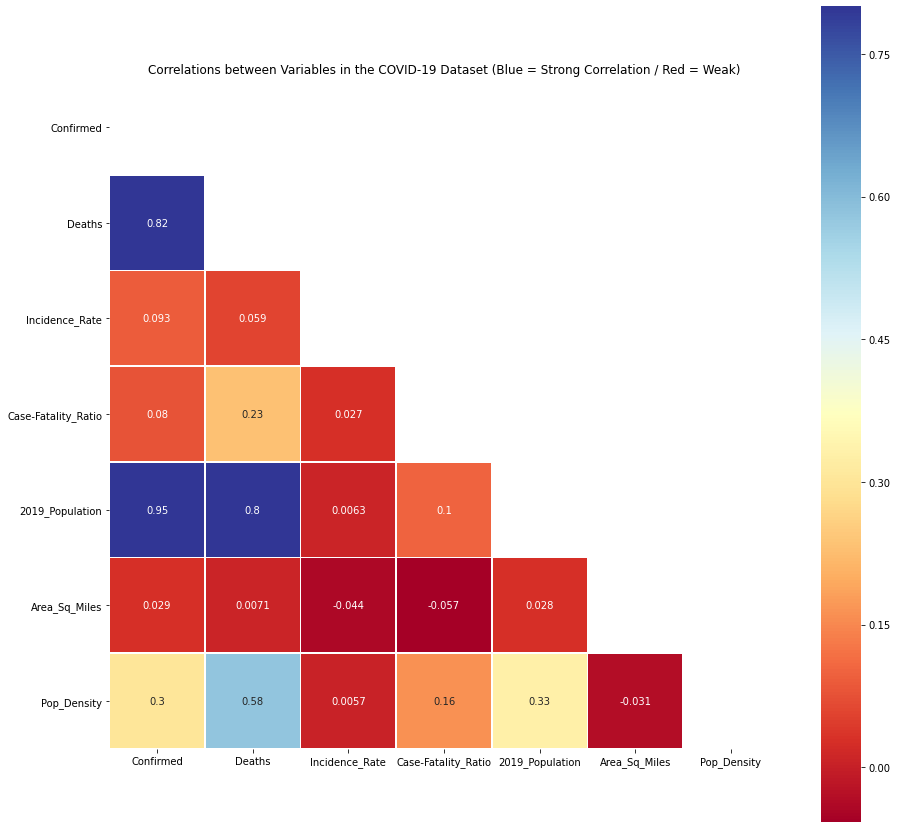

In [192]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, ax=ax, vmax = 0.8, square = True, mask = mask, annot = True, cmap = 'RdYlBu', linewidths = 0.6)
ax.set_title('Correlations between Variables in the COVID-19 Dataset (Blue = Strong Correlation / Red = Weak)')
plt.yticks(rotation=0)
plt.show()

After this correlation heatmap is completed, I see right away that there are strong correlations between the following variables:  Confirmed, Deaths, Pop_Density, and 2019_Population.  So, as a next step, I focus my EDA moving forward on these strongly correlated variables. This is accomplished by applying a "columns_reduced" filter to my dataframe "df" so that I can explore the highly correlated (Confirmed, Deaths, 2019_Population, and Pop_Density) data even further:

* 95% Correlation: Confirmed -- 2019_Population
* 82% Correlation: Confirmed -- Deaths (This is a dependant variable)
* 80% Correlation: Deaths -- 2019_Population
* 58% Correlation: Deaths -- Pop_Density

What is beginning to emerge from this analysis is that, as I originally hypothesized, population density and population totals appear to be significant contributing factors behind rates of Coronavirus infections and rates of deaths.  Total Populations appear to be the most significantly correlated variables with both Confirmed cases and Death, but Population Density only appears to be slightly correlated with Deaths, and not strongly correlated with Confirmed cases.

## Heatmaps: Correlations in States with a Democratic Governor

In [193]:
columns_reduced = ['Confirmed', 'Deaths', '2019_Population', 'Pop_Density','Governor','party']

In [194]:
df_g_dem = df[df['Governor'] == 'democrat']

In [195]:
df_g_dem_corr = df_g_dem[columns_reduced]

In [196]:
corrmat_g_dem = df_g_dem_corr.corr()

In [197]:
corrmat_g_dem

,Confirmed,Deaths,2019_Population,Pop_Density
Confirmed,1.000000,0.821956,0.963117,0.323108
Deaths,0.821956,1.000000,0.778273,0.607117
2019_Population,0.963117,0.778273,1.000000,0.325917
Pop_Density,0.323108,0.607117,0.325917,1.000000


In [198]:
mask = np.triu(np.ones_like(corrmat_g_dem, dtype = bool))

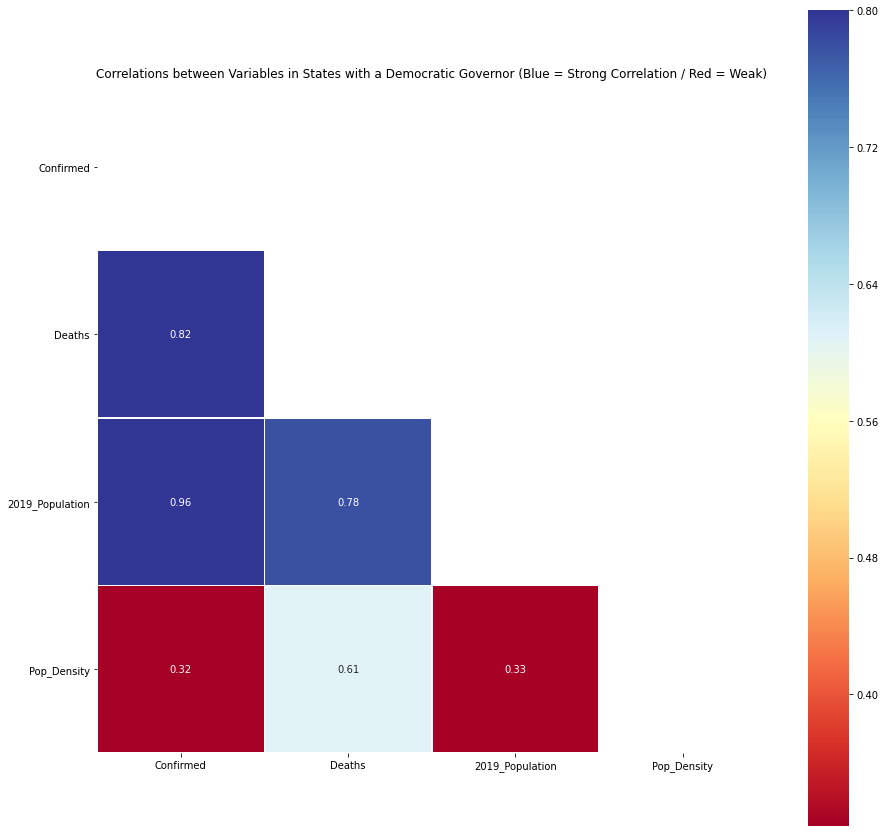

In [199]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat_g_dem, ax=ax, vmax = 0.8, square = True, mask = mask, annot = True, cmap = 'RdYlBu', linewidths = 0.6)
ax.set_title('Correlations between Variables in States with a Democratic Governor (Blue = Strong Correlation / Red = Weak)')
plt.yticks(rotation=0)
plt.show()

Strong correlations between the following variables are reaffirmed in this subset:  Confirmed, Deaths, Pop_Density, and 2019_Population:

* 96% Correlation: Confirmed -- 2019_Population
* 82% Correlation: Confirmed -- Deaths
* 78% Correlation: Deaths -- 2019_Population
* 61% Correlation: Deaths -- Pop_Density

## Heatmaps: Correlations in States with a Republican Governor

In [200]:
df_g_rep = df[df['Governor'] == 'republican']

In [201]:
df_g_rep_corr = df_g_rep[columns_reduced]

In [202]:
corrmat_g_rep = df_g_rep_corr.corr()

In [203]:
corrmat_g_rep

,Confirmed,Deaths,2019_Population,Pop_Density
Confirmed,1.000000,0.907389,0.946540,0.463455
Deaths,0.907389,1.000000,0.891529,0.499914
2019_Population,0.946540,0.891529,1.000000,0.541489
Pop_Density,0.463455,0.499914,0.541489,1.000000


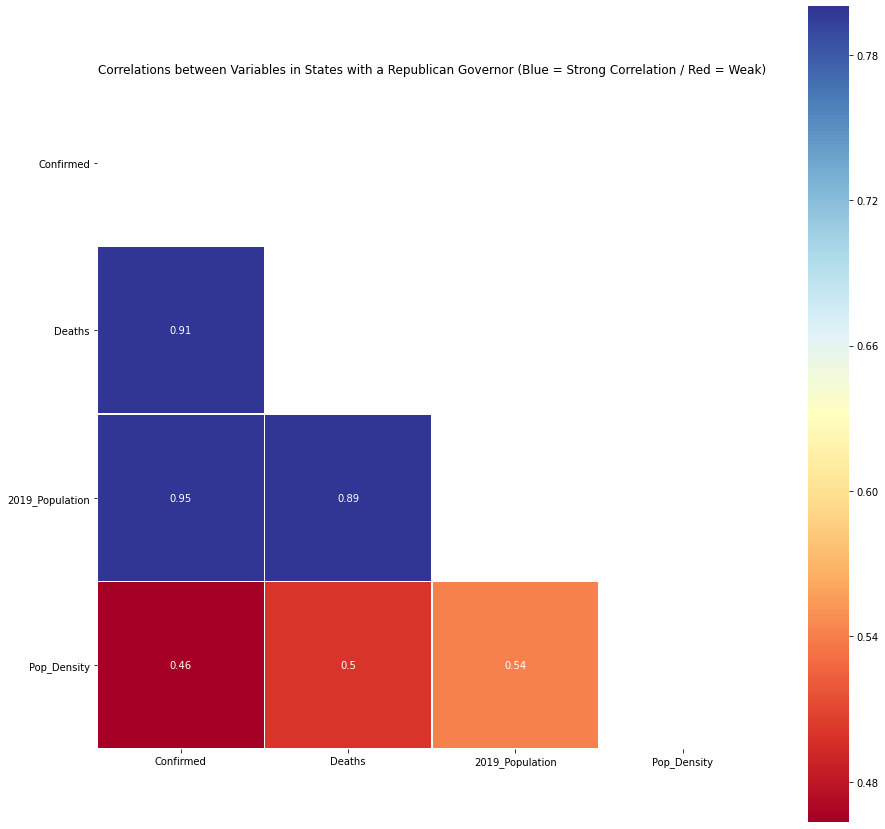

In [204]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat_g_rep, ax=ax, vmax = 0.8, square = True, mask = mask, annot = True, cmap = 'RdYlBu', linewidths = 0.6)
ax.set_title('Correlations between Variables in States with a Republican Governor (Blue = Strong Correlation / Red = Weak)')
plt.yticks(rotation=0)
plt.show()

Strong correlations between the following variables are reaffirmed in this subset:  Confirmed, Deaths, Pop_Density, and 2019_Population, with one exception noted below:

* 95% Correlation: Confirmed -- 2019_Population
* 91% Correlation: Confirmed -- Deaths (Higher than Democrats which was 82%)
* 89% Correlation: Deaths -- 2019_Population
* NOT Strongly Correlated (only 50%): Deaths -- Pop_Density

## Heatmaps Correlations in Counties Voted for Democratic President in 2016

In [205]:
df_p_dem = df[df['party'] == 'democrat']

In [206]:
df_p_dem_corr = df_p_dem[columns_reduced]

In [207]:
corrmat_p_dem = df_p_dem_corr.corr()

In [208]:
corrmat_p_dem

,Confirmed,Deaths,2019_Population,Pop_Density
Confirmed,1.000000,0.795598,0.944012,0.254526
Deaths,0.795598,1.000000,0.772264,0.563406
2019_Population,0.944012,0.772264,1.000000,0.276382
Pop_Density,0.254526,0.563406,0.276382,1.000000


In [209]:
mask = np.triu(np.ones_like(corrmat_p_dem, dtype = bool))

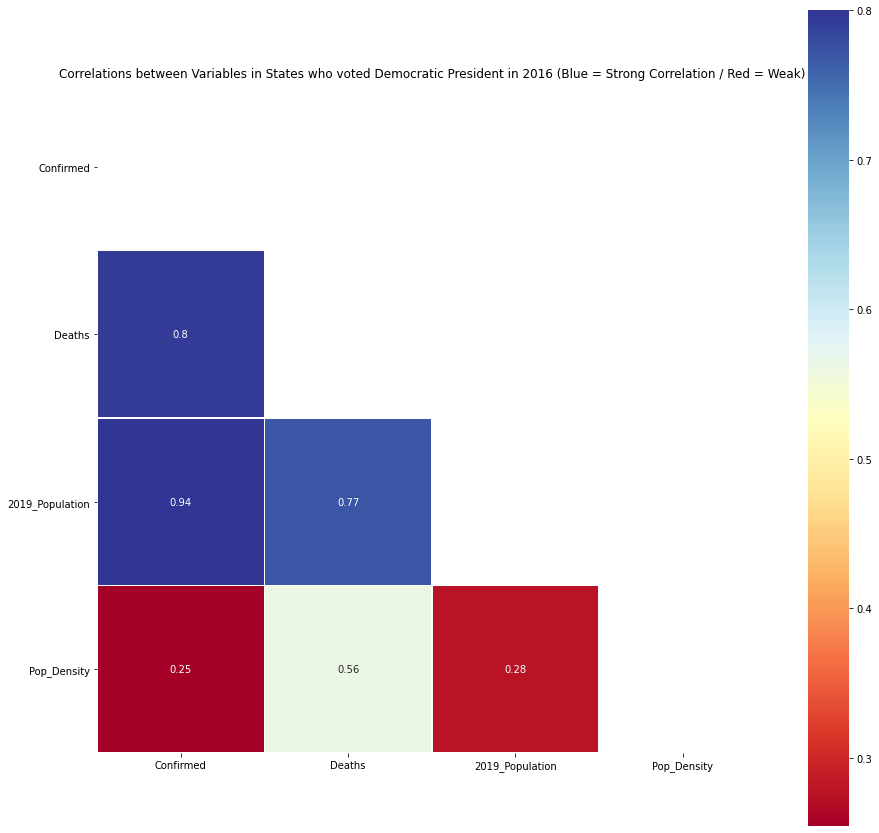

In [210]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat_p_dem, ax=ax, vmax = 0.8, square = True, mask = mask, annot = True, cmap = 'RdYlBu', linewidths = 0.6)
ax.set_title('Correlations between Variables in States who voted Democratic President in 2016 (Blue = Strong Correlation / Red = Weak)')
plt.yticks(rotation=0)
plt.show()

Strong correlations between the following variables are reaffirmed in this subset:  Confirmed, Deaths, Pop_Density, and 2019_Population, with one exception noted below:

* 94% Correlation: Confirmed -- 2019_Population
* 80% Correlation: Confirmed -- Deaths
* 77% Correlation: Deaths -- 2019_Population
* NOT Strongly Correlated (only 56%): Deaths -- Pop_Density

## Heatmaps: Correlations in Counties Voted for Republican President in 2016

In [211]:
df_p_rep = df[df['party'] == 'republican']

In [212]:
df_p_rep_corr = df_p_rep[columns_reduced]

In [213]:
corrmat_p_rep = df_p_rep_corr.corr()

In [214]:
corrmat_p_rep

,Confirmed,Deaths,2019_Population,Pop_Density
Confirmed,1.000000,0.891511,0.951561,0.435417
Deaths,0.891511,1.000000,0.869987,0.496707
2019_Population,0.951561,0.869987,1.000000,0.513652
Pop_Density,0.435417,0.496707,0.513652,1.000000


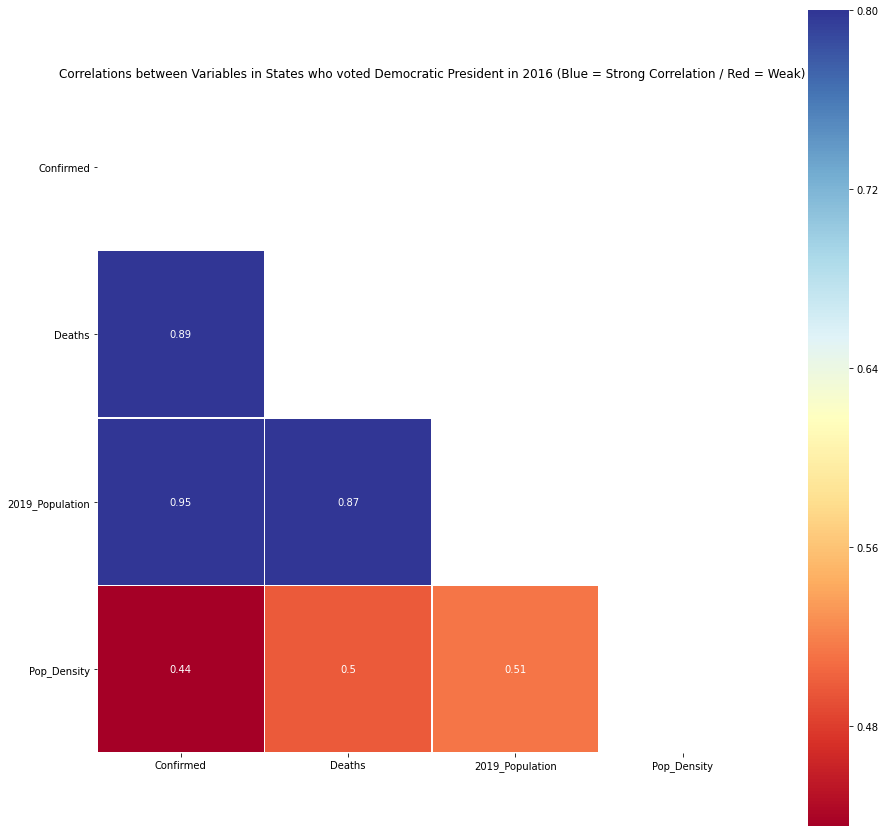

In [215]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat_p_rep, ax=ax, vmax = 0.8, square = True, mask = mask, annot = True, cmap = 'RdYlBu', linewidths = 0.6)
ax.set_title('Correlations between Variables in States who voted Democratic President in 2016 (Blue = Strong Correlation / Red = Weak)')
plt.yticks(rotation=0)
plt.show()

Strong correlations between the following variables are reaffirmed in this subset:  Confirmed, Deaths, Pop_Density, and 2019_Population, with one exception noted below:

* 95% Correlation: Confirmed -- 2019_Population
* 89% Correlation: Confirmed -- Deaths (Higher than Democrats which was 80%)
* 87% Correlation: Deaths -- 2019_Population (Higher than Democrats which was 77%)
* NOT Strongly Correlated (only 50%): Deaths -- Pop_Density

So in conclusion the only correlation that I will not continue to analyze moving forward is the slight (but weaker) correlation between Deaths and Population Density. The one conclusion that I will draw from this, however, is that this correlation appears to be strongest (61% correlation) in states with a Democratic Governor. This may (or may not) be statistically significant, but I choose not to explore this further in this EDA.

## Pairplots: Histograms and Scatterplots, by Democrat or Republican Governor

In [216]:
pal = sns.color_palette("seismic_r", 2)

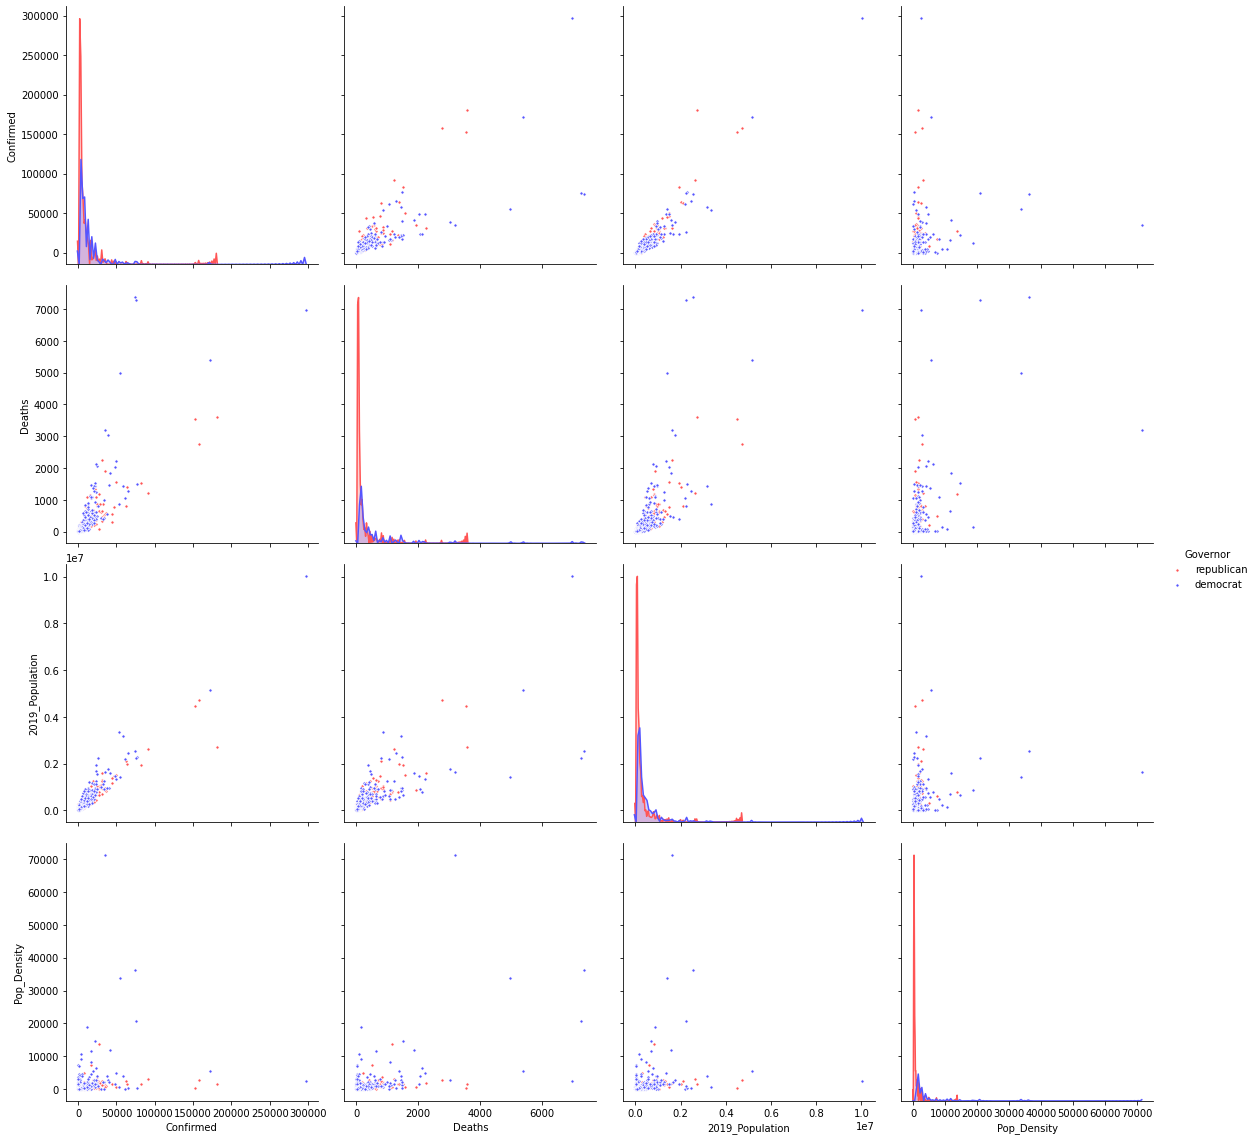

In [217]:
sns.pairplot(df[columns_reduced], hue = 'Governor', height = 4, plot_kws={"s": 10}, palette = pal)
plt.show()

With this Seaborn plot, I am able to see histograms (on the diagonal) for each variable as well as scatterplots for the relationships between each variable. Generally (as the correlation heatmaps revealed previously), each of the variables are positively correlated but due to the large differences in ranges, it is relatively difficult to detect anything significant. So over the next few cells, I create a log_base_10 transformation of all of the numerical data, thus allowing a better visual way to view the data.

In [218]:
df_log = df[columns_reduced]

The df_log dataset transforms each variable (Confirmed, Deaths, 2019_Population, Pop_Density) by using the np.log function in Numpy. This calculates the Base 10 Log of each value in the dataset. Therefore, the next visuals show the data on a logrithmic scale (power of 10).

In [219]:
df_log[['log_Confirmed', 'log_Deaths', 'log_2019_Population', 'log_Pop_Density']] = np.log(df_log[['Confirmed', 'Deaths', '2019_Population', 'Pop_Density']].replace(0, np.nan))

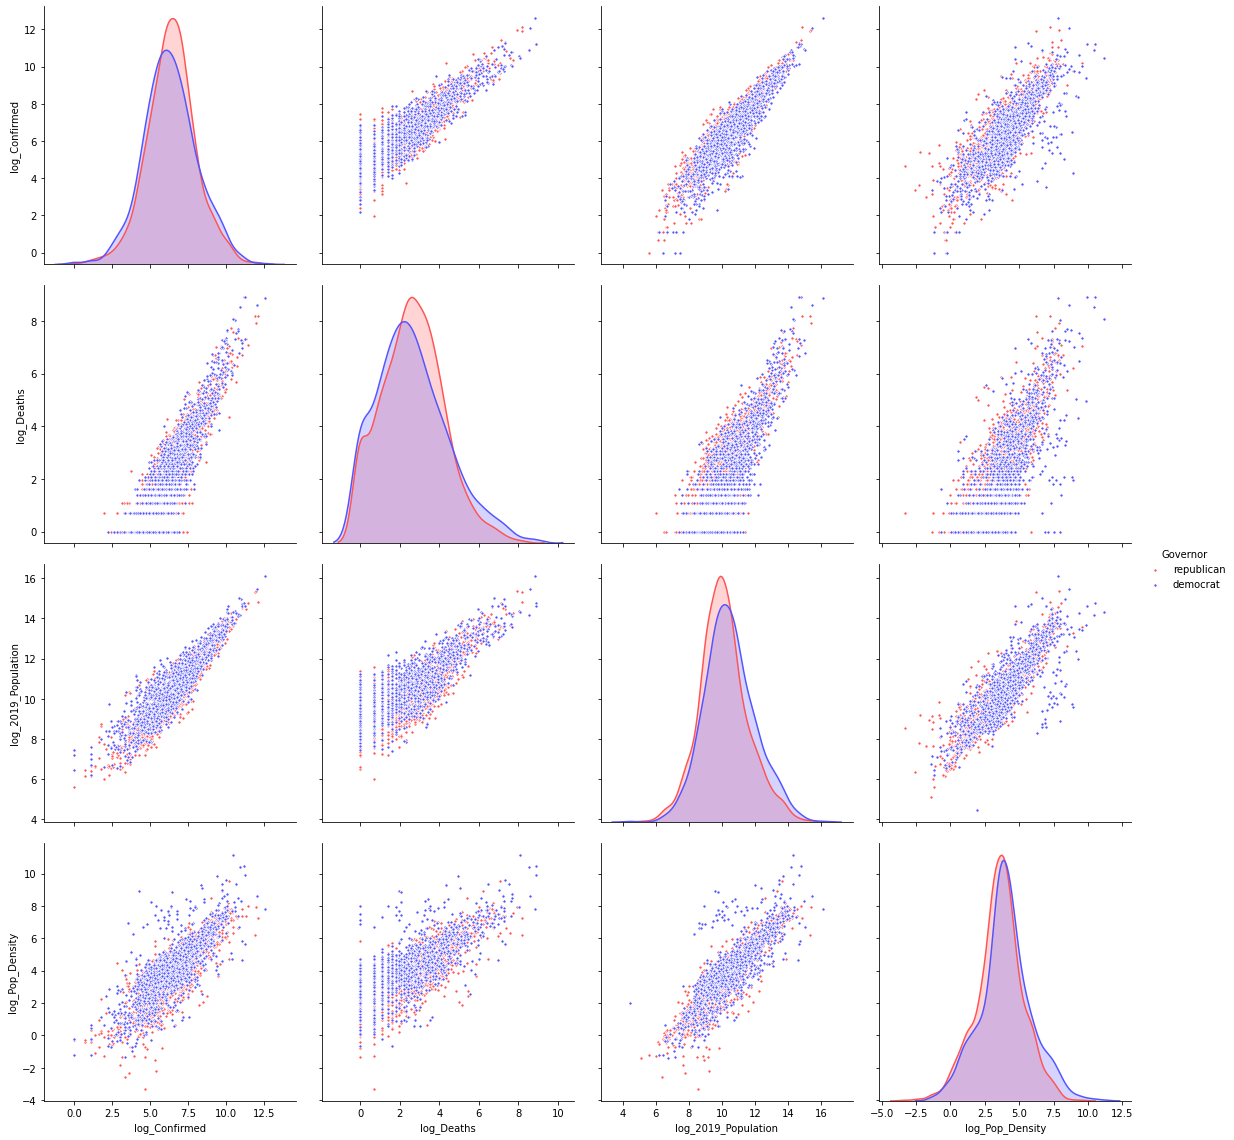

In [220]:
sns.pairplot(df_log[['log_Confirmed', 'log_Deaths', 'log_2019_Population', 'log_Pop_Density', 'Governor']], hue = 'Governor', height = 4, plot_kws={"s": 10}, palette = pal)
plt.show()

Observations:

For the Histograms:

* I notice that there is similarity in shapes among all of the histogram distributions, with the Log_10 Histograms being generally symmetrical.
* The median values (and thus also likely the mean values) for the distributions are slightly different for each category. 
* For both log_Confirmed and log_Deaths, the median and mean for Republican States is slightly higher than Democrat States, whereas for both log_2019_Population and log_Pop_Density, that trend is reversed (meaning the Democratic states have a higher mean/median log_2019_Population and log_Pop_Density than Republican states). This appears to be a significant outcome, meaning that the rates of Confirmed Covid-19 Cases and Deaths are higher in Republican States, even though their Populations and Densities are lower.

For the Scatterplots:

* As noted previously the Confirmed<-->2019_Population and Confirmed<-->Deaths are the relationships which visually show the highest level of correlations. The third most correlated plot is the Deaths<-->2019_Population.

## Pairplots: Histograms and Scatterplots, by County Voting either Democrat or Republican in the 2016 Presidential Election

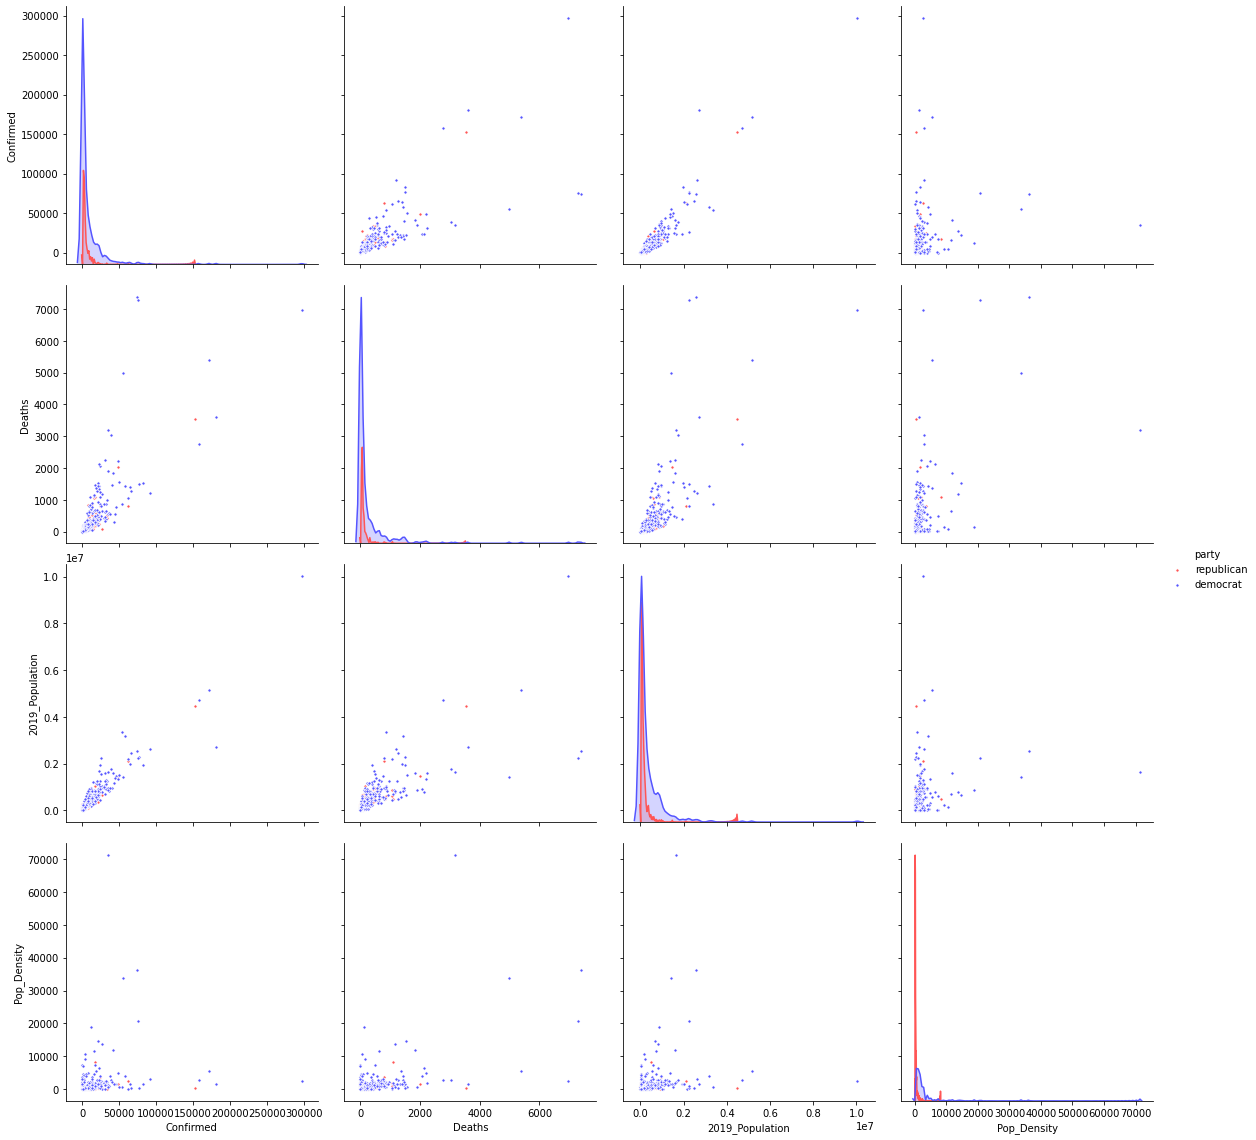

In [221]:
sns.pairplot(df[columns_reduced], hue = 'party', height = 4, plot_kws={"s": 10}, palette = pal)
plt.show()

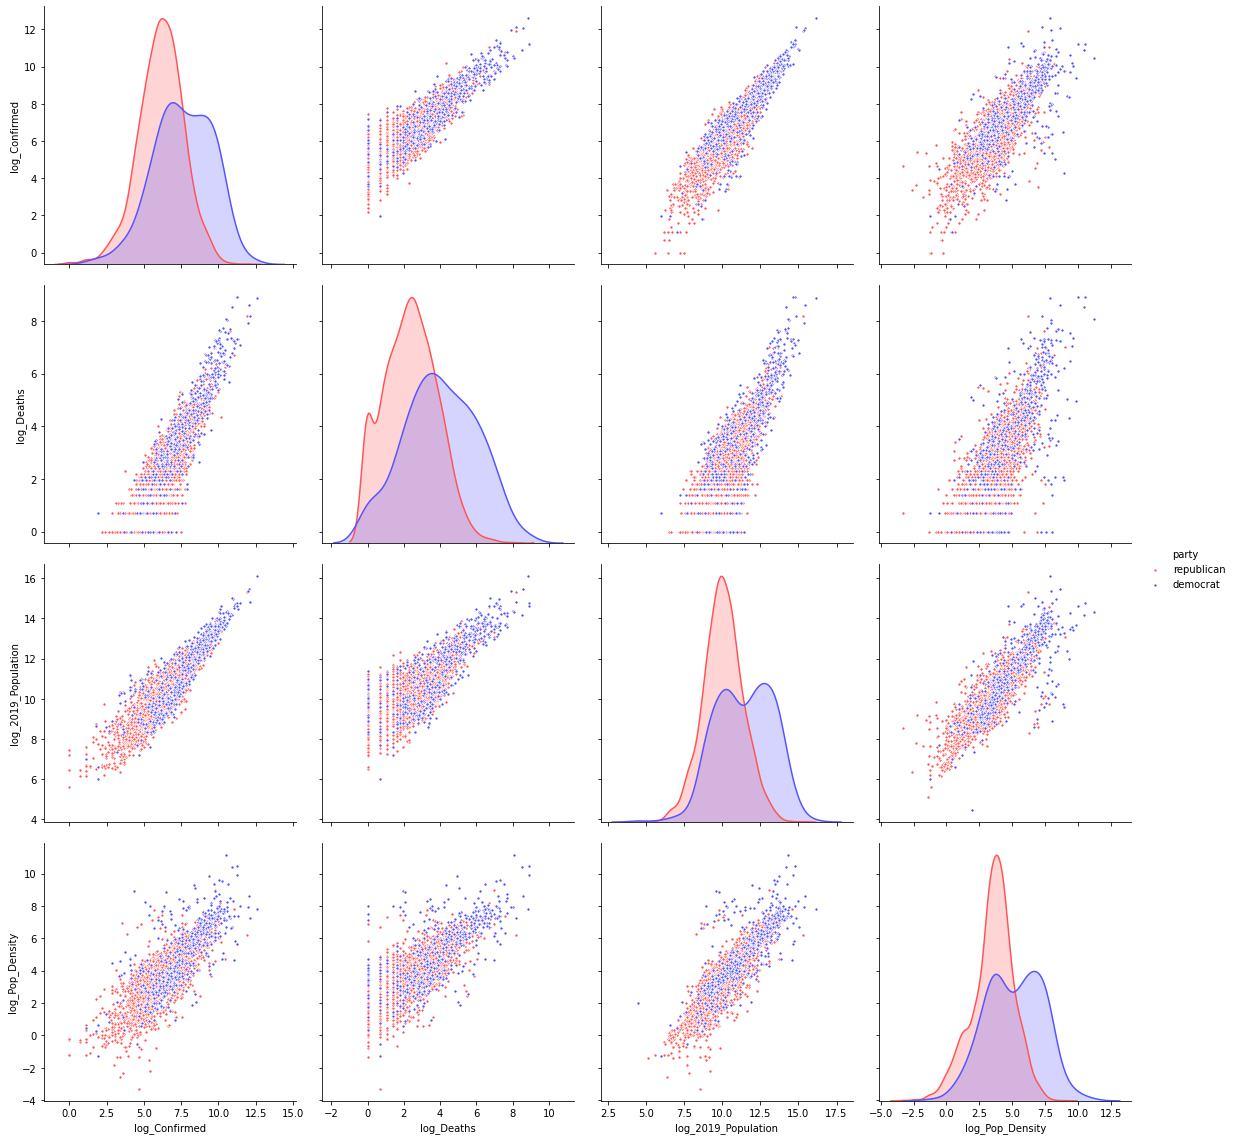

In [222]:
sns.pairplot(df_log[['log_Confirmed', 'log_Deaths', 'log_2019_Population', 'log_Pop_Density', 'party']], hue = 'party', height = 4, plot_kws={"s": 10}, palette = pal)
plt.show()

Observations:

For the Histograms:

* I notice that there is more irregularity in shapes among all of the histogram distributions, with the Republican County Log_10 Histograms exhibiting symmetry with the exception of Log_Deaths which has an interesting small 2nd peak on the lower end of the distribution

* The Democratic counties show a very interesting "double peak" distribution. This is probably NOT a characteristic which I will have time to explore in this EDA, but it does warrant further investigation in the future. It almost seems as if there are two overlapping Democratic County populations, one which seems to align more with with their Republican counterparts, and one which has distinctly different values. It may (or may not) be due to Urban Democratic Counties versus Rural Democratic Counties, so future studies should explore this.  Both the Population / Density histograms exhibit this "double peak" characteristic, and the Confirmed histogram shows similarities with an "almost double peak" and the Death histogram showing a slight "bulge" to the right end of the histogram

* Due to the aforementioned "double peaks" in the Democratic Counties, the median and mean values for the distributions are slightly different for each category. 

* For all four variables -- log_Confirmed, log_Deaths, log_2019_Population and log_Pop_Density -- the median and mean for Republican Counties consistently lower than Democratic Counties. Seeing these trends among all of the variables lends credibility to the hypothesis that the relationship that Population has with Confirmed Cases and Deaths is a confounding relationship that exhibits itself as "Red" versus "Blue".

For the Scatterplots:

* As noted previously the Confirmed<-->2019_Population and Confirmed<-->Deaths are the relationships which visually show the highest level of correlations. The third most correlated plot is the Deaths<-->2019_Population.

* Another aspect to note in these scatterplots is that in Confirmed<-->2019_Population, Confirmed<-->Pop_Density, and 2019_Population<-->Pop_Density scatterplots all show Republican Counties towards the lower left of the plots, while Democratic Counties trend more toward the upper right of the plots.

## Statistics for Confirmed, Deaths, Population, and Density, in States with Democratic versus Republican Governors

With the "columns_reduced" filter, I now look at the basic statistics for this reduced dataset. I first display the statistics grouped by the "Governor" variable, which representsStates that are led by either Democratic or Republican Governors

In [223]:
pd.set_option('display.max_rows', 1000)
df_log.groupby('Governor').describe().transpose().round(2)

Governor                      democrat  republican
Confirmed           count      1358.00     1784.00
                    mean       2930.19     2445.08
                    std       11571.72     8856.20
                    min           0.00        0.00
                    25%         178.00      210.00
                    50%         522.50      605.50
                    75%        1706.75     1570.50
                    max      296821.00   181017.00
Deaths              count      1358.00     1784.00
                    mean         93.96       52.71
                    std         458.58      197.78
                    min           0.00        0.00
                    25%           2.00        3.00
                    50%           8.00       11.00
                    75%          32.00       34.00
                    max        7381.00     3597.00
2019_Population     count      1358.00     1784.00
                    mean     131609.33    83808.33
                    std      416400.83   250861.47
                    min           0.00      169.00
                    25%       13174.25     9769.75
                    50%       31805.50    22159.00
                    75%       90968.25    55609.75
                    max    10039107.00  4713325.00
Pop_Density         count      1358.00     1784.00
                    mean        439.07      146.04
                    std        2648.15      493.66
                    min           0.00        0.04
                    25%          20.79       14.29
                    50%          53.20       38.58
                    75%         158.37       96.27
                    max       71340.60    13824.71
log_Confirmed       count      1355.00     1758.00
                    mean          6.35        6.42
                    std           1.77        1.62
                    min           0.00        0.00
                    25%           5.21        5.41
                    50%           6.28        6.44
                    75%           7.45        7.37
                    max          12.60       12.11
log_Deaths          count      1172.00     1586.00
                    mean          2.65        2.66
                    std           1.80        1.57
                    min           0.00        0.00
                    25%           1.39        1.61
                    50%           2.48        2.64
                    75%           3.71        3.66
                    max           8.91        8.19
log_2019_Population count      1357.00     1784.00
                    mean         10.48       10.12
                    std           1.53        1.45
                    min           4.45        5.13
                    25%           9.49        9.19
                    50%          10.37       10.01
                    75%          11.42       10.93
                    max          16.12       15.37
log_Pop_Density     count      1357.00     1784.00
                    mean          4.04        3.59
                    std           1.88        1.70
                    min          -1.41       -3.33
                    25%           3.04        2.66
                    50%           3.97        3.65
                    75%           5.07        4.57
                    max          11.18        9.53

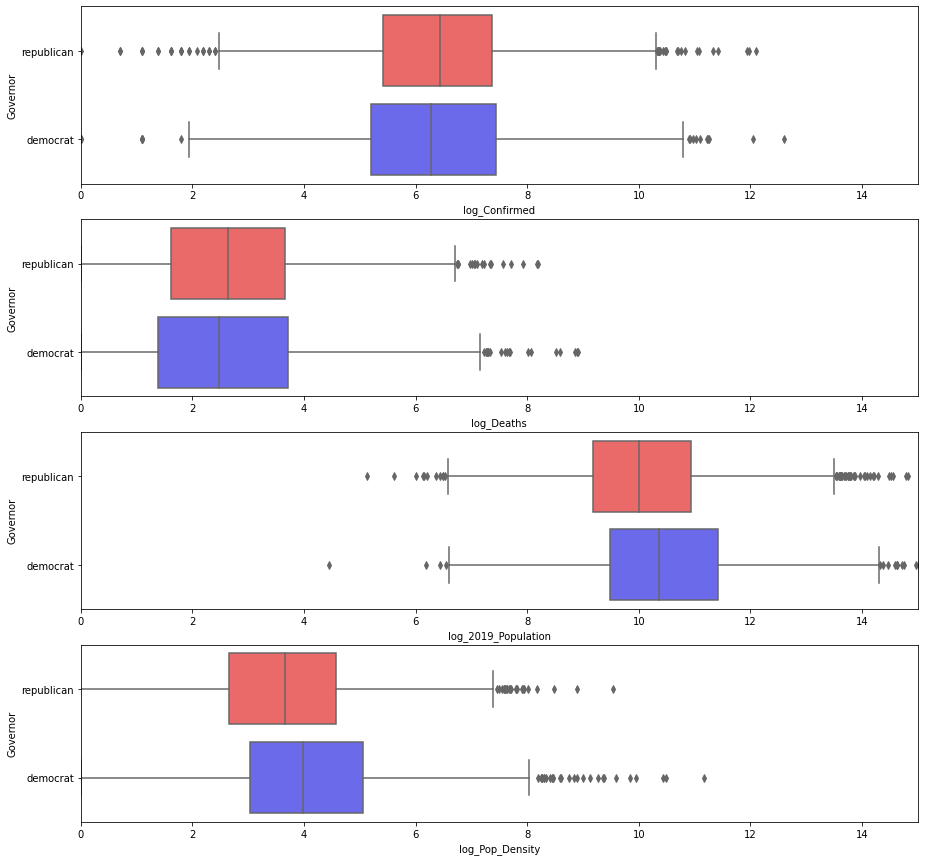

In [224]:
fig, ax = plt.subplots(4, 1, figsize=(15,15))

sns.boxplot(ax = ax[0], y='Governor', x='log_Confirmed',data = df_log, palette = pal, orient = "h")
ax[0].set(xlim=(0, 15))

sns.boxplot(ax = ax[1], y='Governor', x='log_Deaths',data = df_log, palette = pal, orient = "h")
ax[1].set(xlim=(0, 15))

sns.boxplot(ax = ax[2], y='Governor', x='log_2019_Population',data = df_log, palette = pal, orient = "h")
ax[2].set(xlim=(0, 15))

sns.boxplot(ax = ax[3], y='Governor', x='log_Pop_Density',data = df_log, palette = pal, orient = "h")
ax[3].set(xlim=(0, 15))

plt.show()

Here are my observations of the statistics, when grouped by the "Governor" variable:

* Count: There are just slightly more counties in Republican-Governor States (1784) as compared to counties in Democratic-Governor States (1358)
* Mean: For two variables (Confirmed Cases, Deaths), the distribution is shifted in the opposite direction for the other two variables (Pop_Density and 2019_Population).     
* Standard Deviation: There is a high degree of variability to this dataset, across the board.
* Median: As will Mean, for two variables (Confirmed Cases, Deaths), the median is shifted in the opposite direction for the other two variables (Pop_Density and 2019_Population), meaning the median for Democrat States is LOWER for Confirmed Cases and Deaths as compared to Republican States, where as the median for Democrat States is HIGHER for 2019_Population and Pop_Density.

## Statistics for Confirmed, Deaths, Population, and Density, in Counties who voted either Democratic or Republican for President in 2016

I secondly display the dataset statistics grouped by the "party" variable, which identifies how a county voted (Democrat or Republican) in the 2016 Presidential Election.

In [225]:
df_log.groupby('party').describe().transpose().round(2)

party                         democrat  republican
Confirmed           count       492.00     2650.00
                    mean       9458.16     1391.62
                    std       22489.27     4185.32
                    min           0.00        0.00
                    25%         529.75      177.00
                    50%        1986.00      485.00
                    75%        9748.25     1268.75
                    max      296821.00   152695.00
Deaths              count       492.00     2650.00
                    mean        295.71       28.74
                    std         779.28      104.04
                    min           0.00        0.00
                    25%          10.00        2.00
                    50%          46.00        8.00
                    75%         218.25       25.00
                    max        7381.00     3536.00
2019_Population     count       492.00     2650.00
                    mean     362875.89    56492.30
                    std      728473.82   137035.53
                    min           0.00      169.00
                    25%       22733.75    10006.00
                    50%      103413.00    22734.50
                    75%      430281.00    53019.50
                    max    10039107.00  4485414.00
Pop_Density         count       492.00     2650.00
                    mean       1198.35      100.83
                    std        4363.21      253.06
                    min           0.00        0.04
                    25%          35.55       14.50
                    50%         178.58       39.45
                    75%         971.05       92.20
                    max       71340.60     8157.32
log_Confirmed       count       488.00     2625.00
                    mean          7.64        6.15
                    std           1.96        1.52
                    min           1.10        0.00
                    25%           6.29        5.22
                    50%           7.61        6.19
                    75%           9.20        7.15
                    max          12.60       11.94
log_Deaths          count       462.00     2296.00
                    mean          4.05        2.38
                    std           2.00        1.45
                    min           0.00        0.00
                    25%           2.64        1.39
                    50%           3.99        2.40
                    75%           5.57        3.37
                    max           8.91        8.17
log_2019_Population count       491.00     2650.00
                    mean         11.47       10.05
                    std           1.83        1.31
                    min           4.45        5.13
                    25%          10.04        9.21
                    50%          11.56       10.03
                    75%          12.98       10.88
                    max          16.12       15.32
log_Pop_Density     count       491.00     2650.00
                    mean          5.18        3.53
                    std           2.13        1.59
                    min          -1.28       -3.33
                    25%           3.58        2.67
                    50%           5.19        3.67
                    75%           6.88        4.52
                    max          11.18        9.01

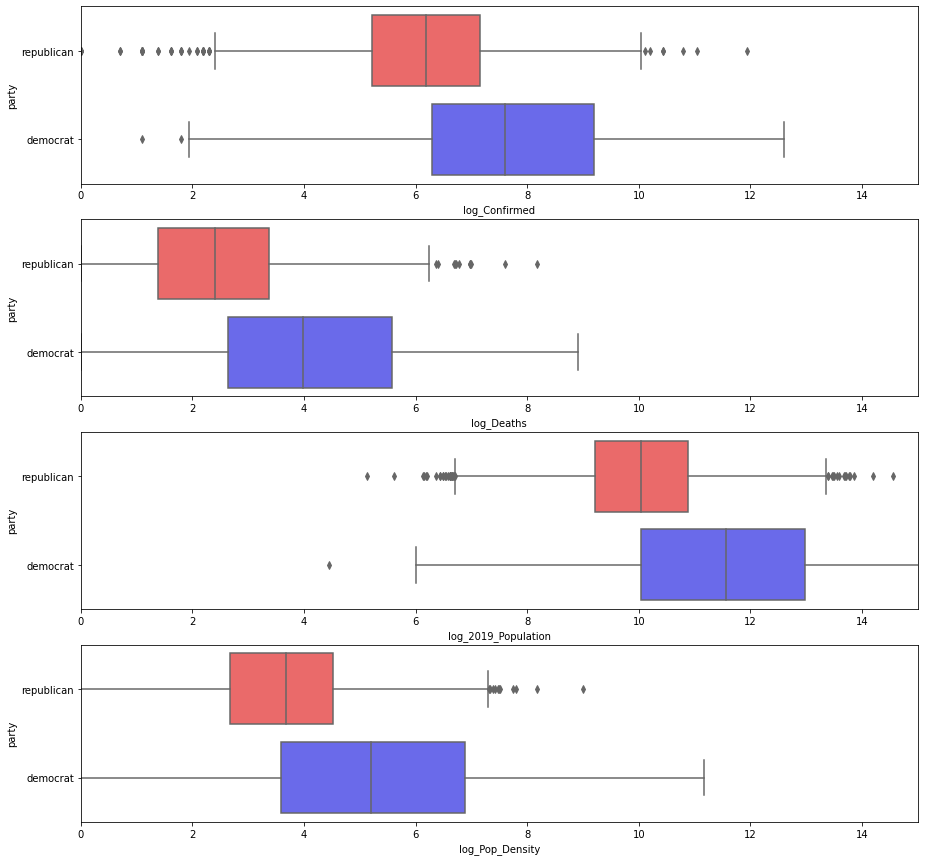

In [226]:
pd.reset_option('display.max_rows')
fig, ax = plt.subplots(4, 1, figsize=(15,15))

sns.boxplot(ax = ax[0], y='party', x='log_Confirmed',data = df_log, palette = pal, orient = "h")
ax[0].set(xlim=(0, 15))

sns.boxplot(ax = ax[1], y='party', x='log_Deaths',data = df_log, palette = pal, orient = "h")
ax[1].set(xlim=(0, 15))

sns.boxplot(ax = ax[2], y='party', x='log_2019_Population',data = df_log, palette = pal, orient = "h")
ax[2].set(xlim=(0, 15))

sns.boxplot(ax = ax[3], y='party', x='log_Pop_Density',data = df_log, palette = pal, orient = "h")
ax[3].set(xlim=(0, 15))

plt.show()

# Final EDA Visuals

As a final step in my EDA Analysis, I produce a series of "lmplots" that are available from the Seaborn library.  Per the documentation, the lmplot() function is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

Source: https://seaborn.pydata.org/generated/seaborn.lmplot.html

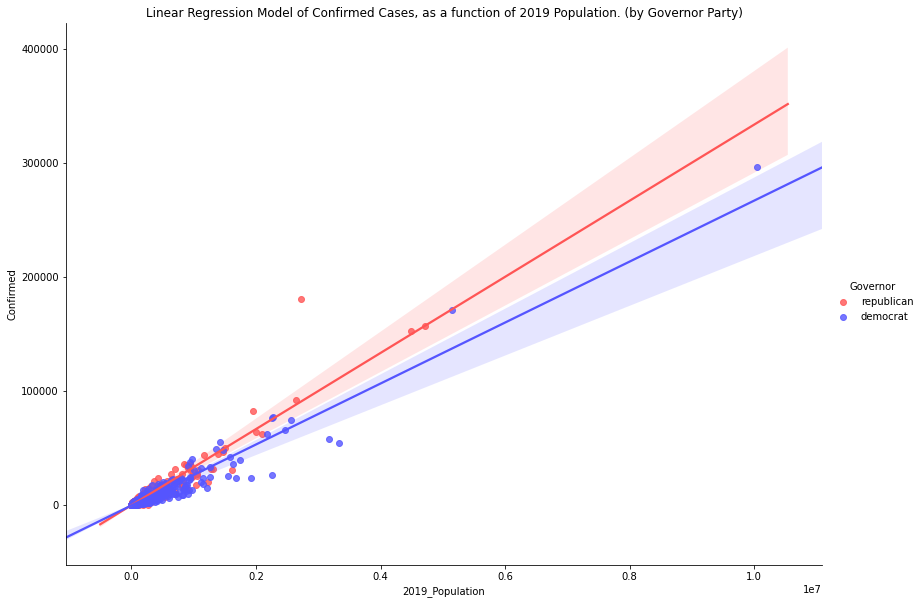

In [227]:
sns.lmplot(data=df,x='2019_Population', y='Confirmed', hue='Governor',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of Confirmed Cases, as a function of 2019 Population. (by Governor Party)')
plt.show()

This is a compelling linear regression plot. It predicts that States led by Republican Governors will have a **higher** rate of Confirmed Cases as compared to States led by Democratic Governors, when using 2019 Populations as a predicting variable.  This means that as population increases in counties, the Confirmed cases increases. And, additionally, this rate of increase is higher for counties in Red states than the rate counties in Blue states.  This supports the hypothesis that Coronavirus infection rates are correlated to population totals in each County, and debunks the "theory" that Blue Counties have higher rates than Red Counties.

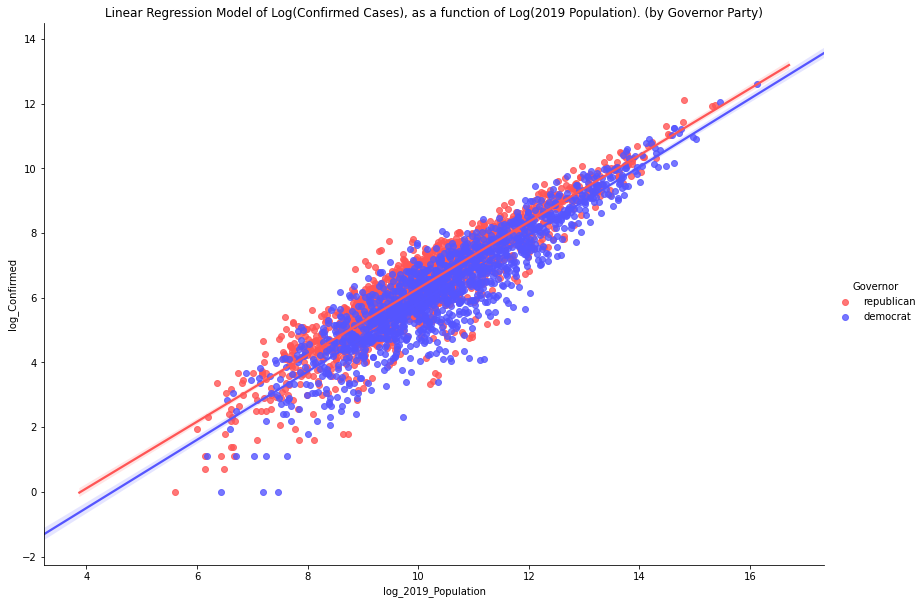

In [228]:
sns.lmplot(data=df_log,x='log_2019_Population', y='log_Confirmed', hue='Governor',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of Log(Confirmed Cases), as a function of Log(2019 Population). (by Governor Party)')
plt.show()

This is a log transform of the previous graph.

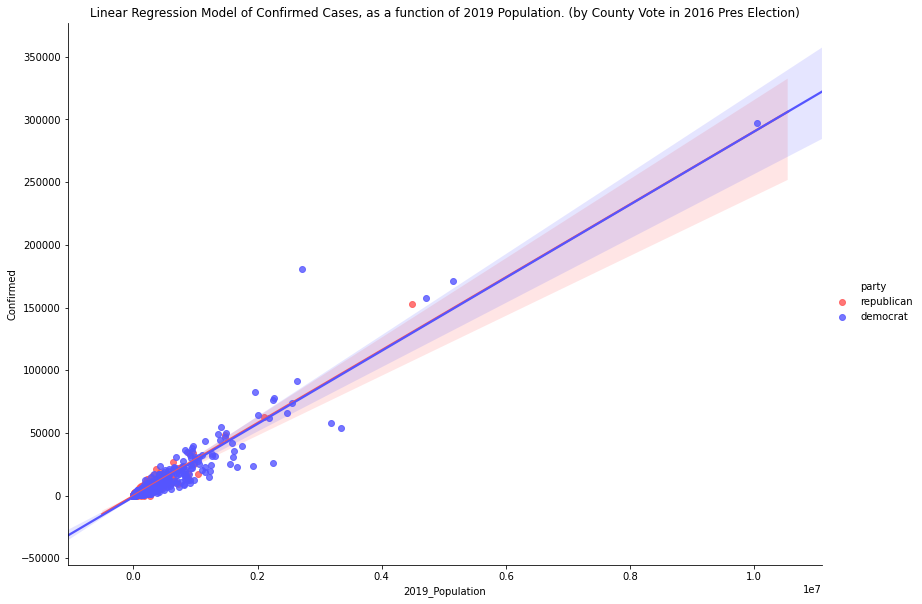

In [229]:
sns.lmplot(data=df,x='2019_Population', y='Confirmed', hue='party',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of Confirmed Cases, as a function of 2019 Population. (by County Vote in 2016 Pres Election)')
plt.show()

This linear regression plot predicts that Confirmed Cases increases, when using 2019 Populations as a predicting variable, and that the rates are roughly equivalent (not statistically significantly different from each other) for both counties that voted Republican in the 2016 Presidential Election and those counties that voted Democratic in the 2016 Presidential Election. 

This means that as population increases in counties, the Confirmed cases increases. And, additionally, this rate of increase is not necessarily any higher in Blue Counties versus Red Counties.  This supports the hypothesis that Coronavirus infection rates are correlated to population totals in each County, and debunks the "theory" that Blue Counties have higher rates than Red Counties.

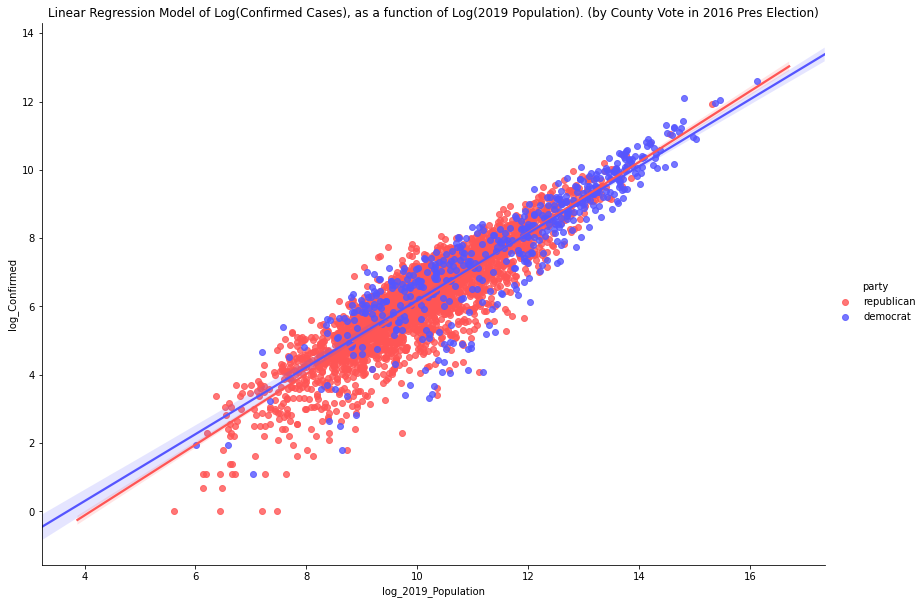

In [230]:
sns.lmplot(data=df_log,x='log_2019_Population', y='log_Confirmed', hue='party',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of Log(Confirmed Cases), as a function of Log(2019 Population). (by County Vote in 2016 Pres Election)')
plt.show()

This is a log transform of the previous graph.

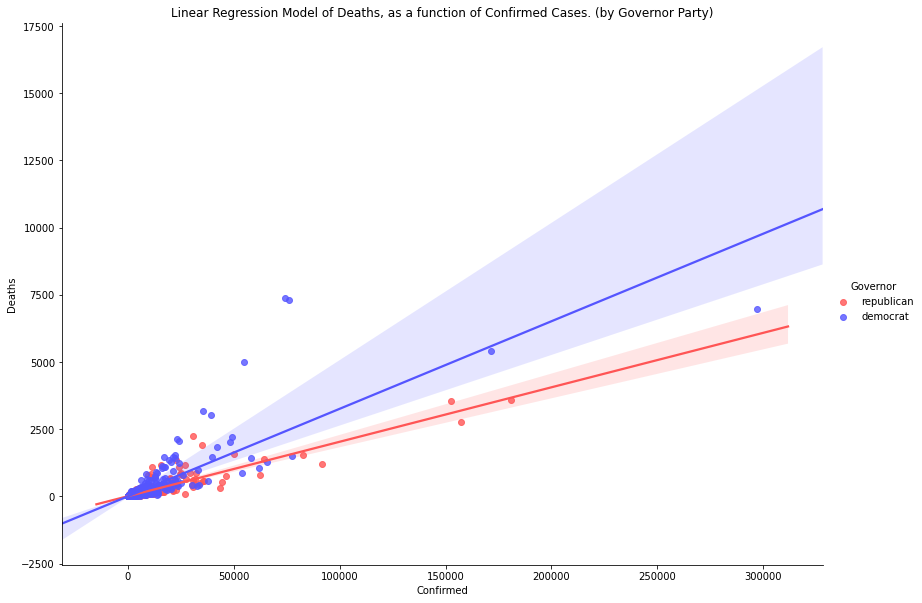

In [231]:
sns.lmplot(data=df,x='Confirmed', y='Deaths', hue='Governor',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of Deaths, as a function of Confirmed Cases. (by Governor Party)')
plt.show()

This linear regression plot predicts that the death rate, when using Confirmed Cases as a predicting variable, increases as Confirmed Cases increased. States led by Democratic Governors will have a higher rate of Deaths to Confirmed Cases, as compared to States led by Republican Governors.  This means that as confirmed cases increases in counties, the deaths increase as well. And, additionally, this rate of increase is higher for counties in Blue states than the rate counties in Red states.  More investigation would need to be completed to understand why this rate is higher for Democratic States.

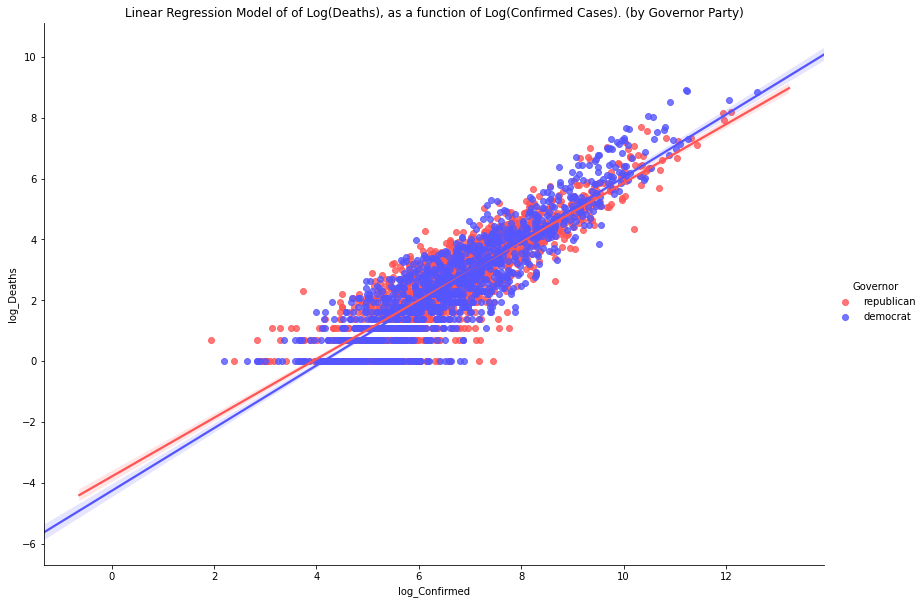

In [232]:
sns.lmplot(data=df_log,x='log_Confirmed', y='log_Deaths', hue='Governor',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of of Log(Deaths), as a function of Log(Confirmed Cases). (by Governor Party)')
plt.show()

This is a log transform of the previous graph.

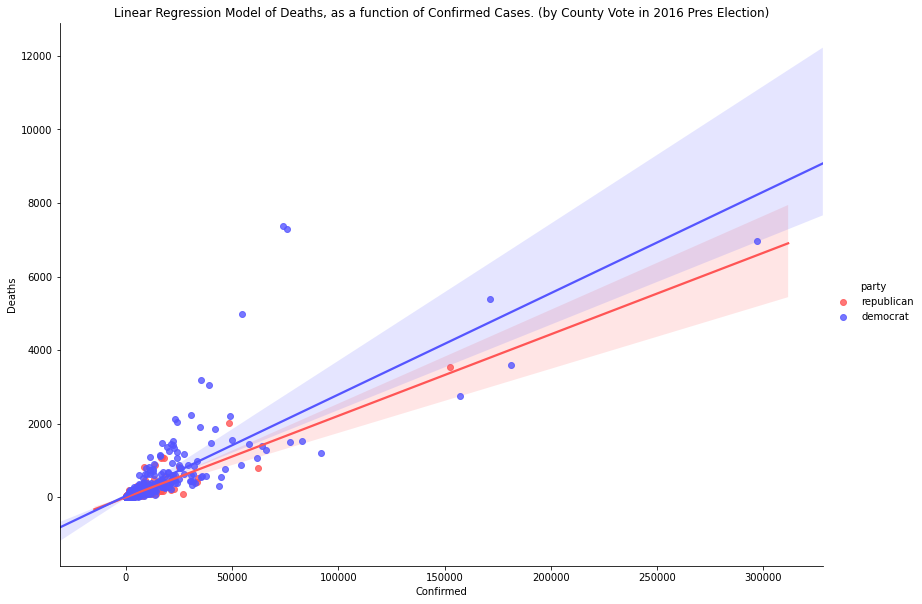

In [233]:
sns.lmplot(data=df,x='Confirmed', y='Deaths', hue='party',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of Deaths, as a function of Confirmed Cases. (by County Vote in 2016 Pres Election)')
plt.show()

This linear regression plot predicts that the death rate, when using Confirmed Cases as a predicting variable, increases as Confirmed Cases increased. Counties that voted Democratic in the 2016 Presidential Elevation will have a slightly higher rate of Deaths to Confirmed Cases, as compared to Counties that voted Democratic in the 2016 Presidential Elevations. There is some overlap of the spread of these predictions, so less certainty is provided for this predication.

This means that as confirmed cases increases in counties, the deaths increase as well. And, additionally, this rate of increase mayhigher for counties in Blue states than the rate counties in Red states.  More investigation would need to be completed to understand why this rate is higher for Democratic States.

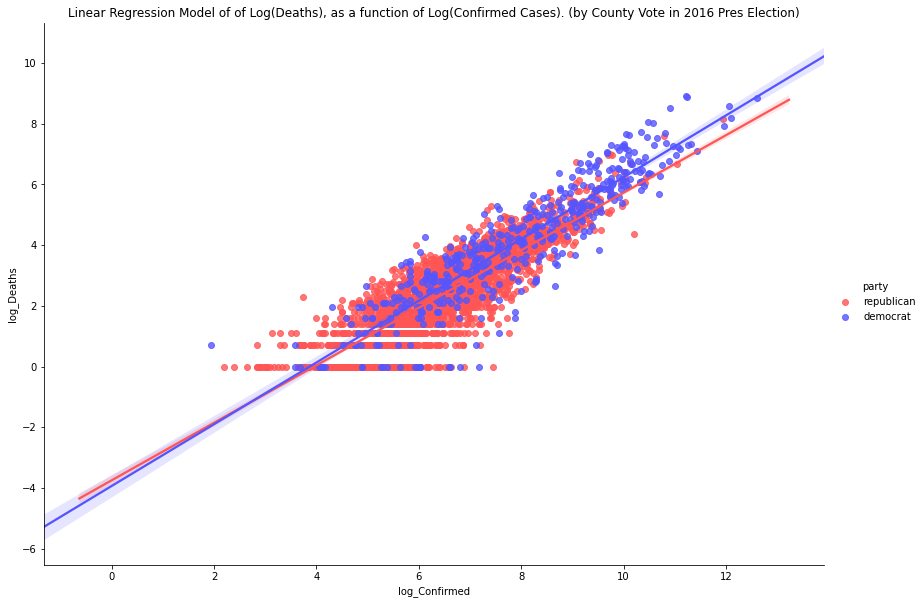

In [234]:
sns.lmplot(data=df_log,x='log_Confirmed', y='log_Deaths', hue='party',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of of Log(Deaths), as a function of Log(Confirmed Cases). (by County Vote in 2016 Pres Election)')
plt.show()

This is a log transform of the previous graph.

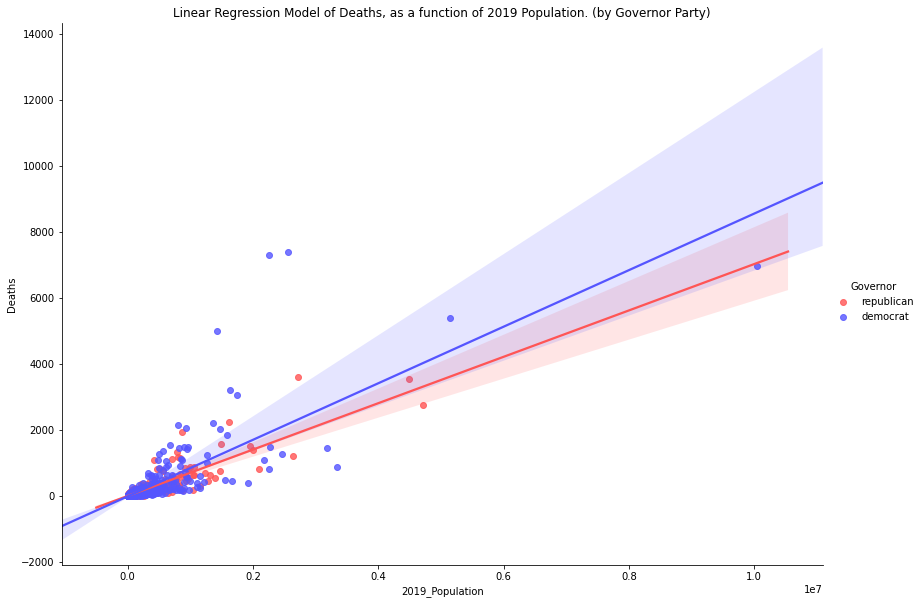

In [235]:
sns.lmplot(data=df,x='2019_Population', y='Deaths', hue='Governor',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of Deaths, as a function of 2019 Population. (by Governor Party)')
plt.show()

This linear regression plot predicts that the death rate, when using Population as a predicting variable, increases as Population increased. States led by Democratic Governors will have a higher rate of Deaths to Population, as compared to States led by Republican Governors.  This means that as population increases in counties, the deaths increase as well. And, additionally, this rate of increase is higher for counties in Blue states than the rate counties in Red states.  More investigation would need to be completed to understand why this rate is higher for Democratic States, however in either case, this graph supports the hypothesis that death rates are correlated to population totals in each County.

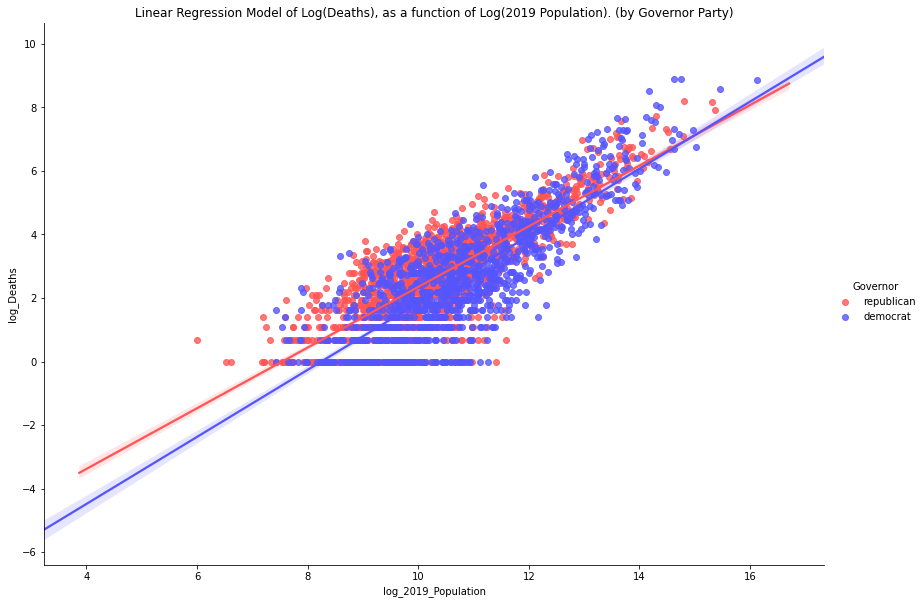

In [236]:
sns.lmplot(data=df_log,x='log_2019_Population', y='log_Deaths', hue='Governor',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of Log(Deaths), as a function of Log(2019 Population). (by Governor Party)')
plt.show()

This is a log transform of the previous graph.

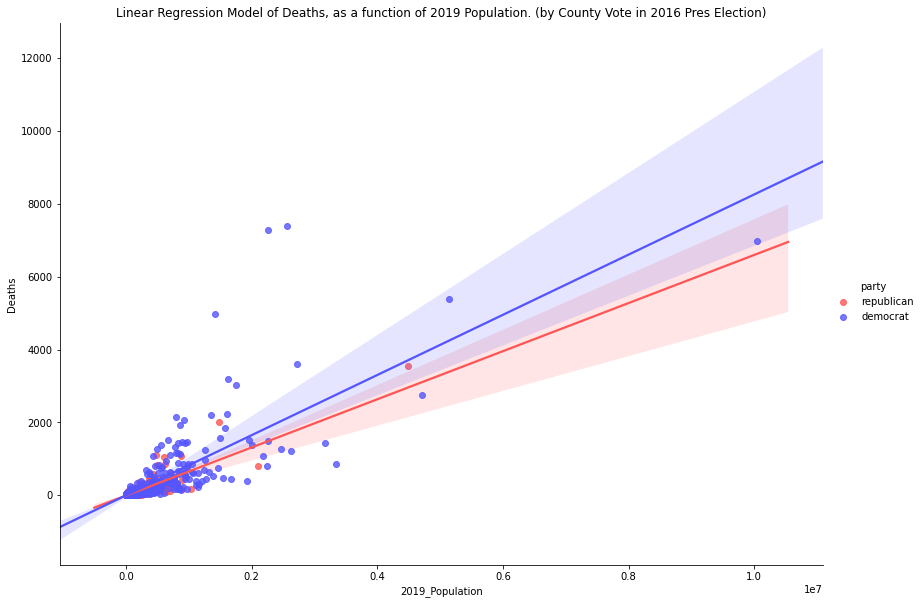

In [237]:
sns.lmplot(data=df,x='2019_Population', y='Deaths', hue='party',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of Deaths, as a function of 2019 Population. (by County Vote in 2016 Pres Election)')
plt.show()

This linear regression plot predicts that the death rate, when using Population as a predicting variable, increases as Population increased. Counties that voted Democratic in the 2016 Presidential Elevation will have a slightly higher rate of Deaths to Confirmed Cases, as compared to Counties that voted Democratic in the 2016 Presidential Elevations. There is some overlap of the spread of these predictions, so less certainty is provided for this predication.  

This means that as population increases in counties, the deaths increase as well. And, additionally, this rate of increase is slightly higher for counties in Blue states than the rate counties in Red states.  More investigation would need to be completed to understand why this rate is higher for Democratic Counties, however in either case, this graph supports the hypothesis that death rates are correlated to population totals in each County.

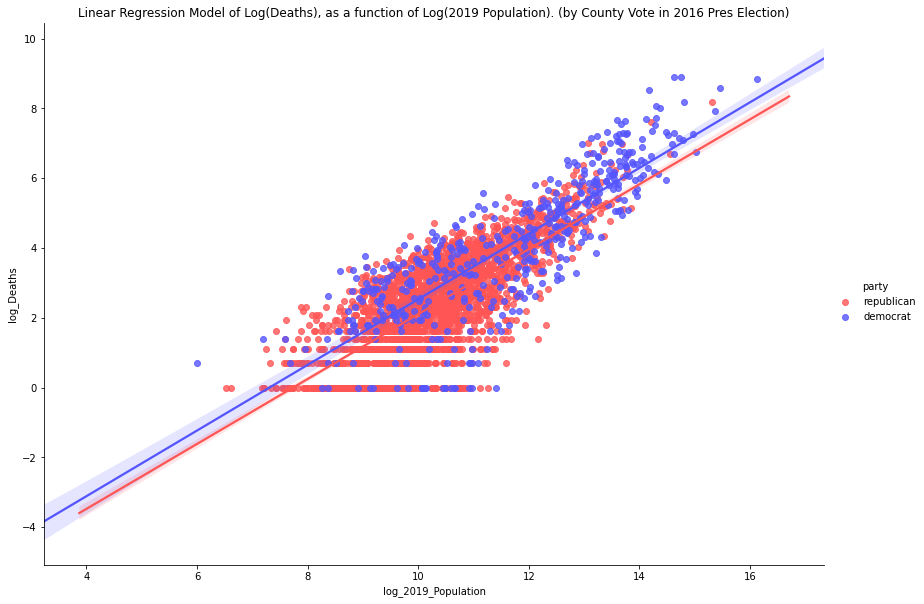

In [238]:
sns.lmplot(data=df_log,x='log_2019_Population', y='log_Deaths', hue='party',height=8.27, aspect=11.7/8.27, palette = pal)
plt.title('Linear Regression Model of Log(Deaths), as a function of Log(2019 Population). (by County Vote in 2016 Pres Election)')
plt.show()

This is a log transform of the previous graph.